In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from PROMETHEE import PROMETHEE_2, optimize_PROM2_original, optimize_newconstraint, optimize_PROM2_original_positive_beta
from sklearn.preprocessing import StandardScaler 

In [2]:
dados = pd.read_excel("dados.xlsx", index_col=0)
dados

,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
Albania,55.9,49.2,35.5,89.1,71.0,58.2,70.7,49.7,81.3,82.8,70,70
Algeria,27.8,29.5,28.4,71.9,50.7,12.1,53.6,51.4,75.1,57.5,30,30
Angola,41.1,24.8,22.9,86.5,86.9,85.1,41.6,53.9,58.9,64.8,30,40
Argentina,34.6,56.8,42.8,66.9,53.9,33.6,55.5,55.1,36.5,61.2,55,60
Armenia,50.3,31.5,51.6,87.5,76.3,71.4,64.9,58.7,70.5,73.6,75,70
...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,60.3,72.2,45.5,98.0,45.5,95.4,49.8,40.1,73.8,59.7,65,40
Venezuela,0.0,3.4,6.5,74.8,95.0,12.0,30.8,34.3,0.0,42.3,0,10
Vietnam,48.7,35.1,36.4,78.6,86.5,88.7,73.4,54.1,70.5,79.4,40,50
Zambia,36.0,44.4,29.9,74.8,69.6,0.0,43.9,42.1,62.2,65.2,55,50


In [5]:
X = np.array(dados) # decision matrix
m, n = X.shape
q = np.array([5 for j in range (n)]) # indiference thresholds vector
p = np.array([10 for j in range (n)]) # preference thresholds vector
s_curve = [0 for j in range (n)]
pref = [5 for j in range (n)]
w = np.random.dirichlet(np.ones(n),size=1).reshape(n) # weights

In [8]:
#solve the problem with PROMETHEE II
net_flows_heritage = PROMETHEE_2 (X, [1.5 for i in range (n)], [3.5 for i in range (n)], [0 for i in range (n)], [1/n for i in range (n)], [5 for i in range (n)])[1]
net_flows_heritage = pd.DataFrame(net_flows_toy, index = dados.index, columns=["$\phi$"])

In [9]:
net_flows_heritage["Position"] = net_flows_toy.rank(ascending=False)
net_flows_heritage

,$\phi$,Position
Albania,0.245524,49.0
Algeria,-0.535476,168.0
Angola,-0.278786,140.0
Argentina,-0.294405,143.0
Armenia,0.178667,62.0
...,...,...
Vanuatu,-0.017167,89.0
Venezuela,-0.735429,174.0
Vietnam,0.041190,82.0
Zambia,-0.430167,164.0


In [10]:
net_flows_heritage.to_excel("RankingPROMETHEEII.xlsx")

In [11]:
pgrn = np.random.RandomState(10) # create a random number generator with a fixed seed

n_simulations = 10000 # number of simulations
W = np.zeros(shape = (n, n_simulations)) # weight matrix
P = np.zeros(shape = (n, n_simulations)) # preference threshold matrix
Q = np.zeros(shape = (n, n_simulations)) # indifference threshold matrix

Net_Flows = np.zeros(shape = (m, n_simulations)) # matrix that will receive the PROMETHEE II net flows
Pos_Flows = np.zeros(shape = (m, n_simulations))
Neg_Flows = np.zeros(shape = (m, n_simulations))
results = [[] for s in range (n_simulations)]


s_curve = [0 for j in range (n)] # it will not be used 
pref = [5 for j in range (n)] # We will always use pref. function 5

for s in range (n_simulations):
    W [:,s] = pgrn.dirichlet(np.ones(n),size=1).reshape(n) # weights come from a dirichlet distribution
    Q [:,s] = pgrn.uniform (1,2, n) # q_j between 1 and 2
    P [:,s] = pgrn.uniform (3, 4, n) # p_j between 3 and 4
    results[s], Net_Flows[:,s], Pos_Flows[:,s], Neg_Flows[:,s] = PROMETHEE_2 (X, Q[:,s], P[:,s], s_curve, W[:,s], pref)
    print (f'simulation {s+1} completed')

simulation 1 completed
simulation 2 completed
simulation 3 completed
simulation 4 completed
simulation 5 completed
simulation 6 completed
simulation 7 completed
simulation 8 completed
simulation 9 completed
simulation 10 completed
simulation 11 completed
simulation 12 completed
simulation 13 completed
simulation 14 completed
simulation 15 completed
simulation 16 completed
simulation 17 completed
simulation 18 completed
simulation 19 completed
simulation 20 completed
simulation 21 completed
simulation 22 completed
simulation 23 completed
simulation 24 completed
simulation 25 completed
simulation 26 completed
simulation 27 completed
simulation 28 completed
simulation 29 completed
simulation 30 completed
simulation 31 completed
simulation 32 completed
simulation 33 completed
simulation 34 completed
simulation 35 completed
simulation 36 completed
simulation 37 completed
simulation 38 completed
simulation 39 completed
simulation 40 completed
simulation 41 completed
simulation 42 completed
s

simulation 334 completed
simulation 335 completed
simulation 336 completed
simulation 337 completed
simulation 338 completed
simulation 339 completed
simulation 340 completed
simulation 341 completed
simulation 342 completed
simulation 343 completed
simulation 344 completed
simulation 345 completed
simulation 346 completed
simulation 347 completed
simulation 348 completed
simulation 349 completed
simulation 350 completed
simulation 351 completed
simulation 352 completed
simulation 353 completed
simulation 354 completed
simulation 355 completed
simulation 356 completed
simulation 357 completed
simulation 358 completed
simulation 359 completed
simulation 360 completed
simulation 361 completed
simulation 362 completed
simulation 363 completed
simulation 364 completed
simulation 365 completed
simulation 366 completed
simulation 367 completed
simulation 368 completed
simulation 369 completed
simulation 370 completed
simulation 371 completed
simulation 372 completed
simulation 373 completed


simulation 662 completed
simulation 663 completed
simulation 664 completed
simulation 665 completed
simulation 666 completed
simulation 667 completed
simulation 668 completed
simulation 669 completed
simulation 670 completed
simulation 671 completed
simulation 672 completed
simulation 673 completed
simulation 674 completed
simulation 675 completed
simulation 676 completed
simulation 677 completed
simulation 678 completed
simulation 679 completed
simulation 680 completed
simulation 681 completed
simulation 682 completed
simulation 683 completed
simulation 684 completed
simulation 685 completed
simulation 686 completed
simulation 687 completed
simulation 688 completed
simulation 689 completed
simulation 690 completed
simulation 691 completed
simulation 692 completed
simulation 693 completed
simulation 694 completed
simulation 695 completed
simulation 696 completed
simulation 697 completed
simulation 698 completed
simulation 699 completed
simulation 700 completed
simulation 701 completed


simulation 990 completed
simulation 991 completed
simulation 992 completed
simulation 993 completed
simulation 994 completed
simulation 995 completed
simulation 996 completed
simulation 997 completed
simulation 998 completed
simulation 999 completed
simulation 1000 completed
simulation 1001 completed
simulation 1002 completed
simulation 1003 completed
simulation 1004 completed
simulation 1005 completed
simulation 1006 completed
simulation 1007 completed
simulation 1008 completed
simulation 1009 completed
simulation 1010 completed
simulation 1011 completed
simulation 1012 completed
simulation 1013 completed
simulation 1014 completed
simulation 1015 completed
simulation 1016 completed
simulation 1017 completed
simulation 1018 completed
simulation 1019 completed
simulation 1020 completed
simulation 1021 completed
simulation 1022 completed
simulation 1023 completed
simulation 1024 completed
simulation 1025 completed
simulation 1026 completed
simulation 1027 completed
simulation 1028 comple

simulation 1306 completed
simulation 1307 completed
simulation 1308 completed
simulation 1309 completed
simulation 1310 completed
simulation 1311 completed
simulation 1312 completed
simulation 1313 completed
simulation 1314 completed
simulation 1315 completed
simulation 1316 completed
simulation 1317 completed
simulation 1318 completed
simulation 1319 completed
simulation 1320 completed
simulation 1321 completed
simulation 1322 completed
simulation 1323 completed
simulation 1324 completed
simulation 1325 completed
simulation 1326 completed
simulation 1327 completed
simulation 1328 completed
simulation 1329 completed
simulation 1330 completed
simulation 1331 completed
simulation 1332 completed
simulation 1333 completed
simulation 1334 completed
simulation 1335 completed
simulation 1336 completed
simulation 1337 completed
simulation 1338 completed
simulation 1339 completed
simulation 1340 completed
simulation 1341 completed
simulation 1342 completed
simulation 1343 completed
simulation 1

simulation 1622 completed
simulation 1623 completed
simulation 1624 completed
simulation 1625 completed
simulation 1626 completed
simulation 1627 completed
simulation 1628 completed
simulation 1629 completed
simulation 1630 completed
simulation 1631 completed
simulation 1632 completed
simulation 1633 completed
simulation 1634 completed
simulation 1635 completed
simulation 1636 completed
simulation 1637 completed
simulation 1638 completed
simulation 1639 completed
simulation 1640 completed
simulation 1641 completed
simulation 1642 completed
simulation 1643 completed
simulation 1644 completed
simulation 1645 completed
simulation 1646 completed
simulation 1647 completed
simulation 1648 completed
simulation 1649 completed
simulation 1650 completed
simulation 1651 completed
simulation 1652 completed
simulation 1653 completed
simulation 1654 completed
simulation 1655 completed
simulation 1656 completed
simulation 1657 completed
simulation 1658 completed
simulation 1659 completed
simulation 1

simulation 1938 completed
simulation 1939 completed
simulation 1940 completed
simulation 1941 completed
simulation 1942 completed
simulation 1943 completed
simulation 1944 completed
simulation 1945 completed
simulation 1946 completed
simulation 1947 completed
simulation 1948 completed
simulation 1949 completed
simulation 1950 completed
simulation 1951 completed
simulation 1952 completed
simulation 1953 completed
simulation 1954 completed
simulation 1955 completed
simulation 1956 completed
simulation 1957 completed
simulation 1958 completed
simulation 1959 completed
simulation 1960 completed
simulation 1961 completed
simulation 1962 completed
simulation 1963 completed
simulation 1964 completed
simulation 1965 completed
simulation 1966 completed
simulation 1967 completed
simulation 1968 completed
simulation 1969 completed
simulation 1970 completed
simulation 1971 completed
simulation 1972 completed
simulation 1973 completed
simulation 1974 completed
simulation 1975 completed
simulation 1

simulation 2254 completed
simulation 2255 completed
simulation 2256 completed
simulation 2257 completed
simulation 2258 completed
simulation 2259 completed
simulation 2260 completed
simulation 2261 completed
simulation 2262 completed
simulation 2263 completed
simulation 2264 completed
simulation 2265 completed
simulation 2266 completed
simulation 2267 completed
simulation 2268 completed
simulation 2269 completed
simulation 2270 completed
simulation 2271 completed
simulation 2272 completed
simulation 2273 completed
simulation 2274 completed
simulation 2275 completed
simulation 2276 completed
simulation 2277 completed
simulation 2278 completed
simulation 2279 completed
simulation 2280 completed
simulation 2281 completed
simulation 2282 completed
simulation 2283 completed
simulation 2284 completed
simulation 2285 completed
simulation 2286 completed
simulation 2287 completed
simulation 2288 completed
simulation 2289 completed
simulation 2290 completed
simulation 2291 completed
simulation 2

simulation 2570 completed
simulation 2571 completed
simulation 2572 completed
simulation 2573 completed
simulation 2574 completed
simulation 2575 completed
simulation 2576 completed
simulation 2577 completed
simulation 2578 completed
simulation 2579 completed
simulation 2580 completed
simulation 2581 completed
simulation 2582 completed
simulation 2583 completed
simulation 2584 completed
simulation 2585 completed
simulation 2586 completed
simulation 2587 completed
simulation 2588 completed
simulation 2589 completed
simulation 2590 completed
simulation 2591 completed
simulation 2592 completed
simulation 2593 completed
simulation 2594 completed
simulation 2595 completed
simulation 2596 completed
simulation 2597 completed
simulation 2598 completed
simulation 2599 completed
simulation 2600 completed
simulation 2601 completed
simulation 2602 completed
simulation 2603 completed
simulation 2604 completed
simulation 2605 completed
simulation 2606 completed
simulation 2607 completed
simulation 2

simulation 2886 completed
simulation 2887 completed
simulation 2888 completed
simulation 2889 completed
simulation 2890 completed
simulation 2891 completed
simulation 2892 completed
simulation 2893 completed
simulation 2894 completed
simulation 2895 completed
simulation 2896 completed
simulation 2897 completed
simulation 2898 completed
simulation 2899 completed
simulation 2900 completed
simulation 2901 completed
simulation 2902 completed
simulation 2903 completed
simulation 2904 completed
simulation 2905 completed
simulation 2906 completed
simulation 2907 completed
simulation 2908 completed
simulation 2909 completed
simulation 2910 completed
simulation 2911 completed
simulation 2912 completed
simulation 2913 completed
simulation 2914 completed
simulation 2915 completed
simulation 2916 completed
simulation 2917 completed
simulation 2918 completed
simulation 2919 completed
simulation 2920 completed
simulation 2921 completed
simulation 2922 completed
simulation 2923 completed
simulation 2

simulation 3202 completed
simulation 3203 completed
simulation 3204 completed
simulation 3205 completed
simulation 3206 completed
simulation 3207 completed
simulation 3208 completed
simulation 3209 completed
simulation 3210 completed
simulation 3211 completed
simulation 3212 completed
simulation 3213 completed
simulation 3214 completed
simulation 3215 completed
simulation 3216 completed
simulation 3217 completed
simulation 3218 completed
simulation 3219 completed
simulation 3220 completed
simulation 3221 completed
simulation 3222 completed
simulation 3223 completed
simulation 3224 completed
simulation 3225 completed
simulation 3226 completed
simulation 3227 completed
simulation 3228 completed
simulation 3229 completed
simulation 3230 completed
simulation 3231 completed
simulation 3232 completed
simulation 3233 completed
simulation 3234 completed
simulation 3235 completed
simulation 3236 completed
simulation 3237 completed
simulation 3238 completed
simulation 3239 completed
simulation 3

simulation 3518 completed
simulation 3519 completed
simulation 3520 completed
simulation 3521 completed
simulation 3522 completed
simulation 3523 completed
simulation 3524 completed
simulation 3525 completed
simulation 3526 completed
simulation 3527 completed
simulation 3528 completed
simulation 3529 completed
simulation 3530 completed
simulation 3531 completed
simulation 3532 completed
simulation 3533 completed
simulation 3534 completed
simulation 3535 completed
simulation 3536 completed
simulation 3537 completed
simulation 3538 completed
simulation 3539 completed
simulation 3540 completed
simulation 3541 completed
simulation 3542 completed
simulation 3543 completed
simulation 3544 completed
simulation 3545 completed
simulation 3546 completed
simulation 3547 completed
simulation 3548 completed
simulation 3549 completed
simulation 3550 completed
simulation 3551 completed
simulation 3552 completed
simulation 3553 completed
simulation 3554 completed
simulation 3555 completed
simulation 3

simulation 3834 completed
simulation 3835 completed
simulation 3836 completed
simulation 3837 completed
simulation 3838 completed
simulation 3839 completed
simulation 3840 completed
simulation 3841 completed
simulation 3842 completed
simulation 3843 completed
simulation 3844 completed
simulation 3845 completed
simulation 3846 completed
simulation 3847 completed
simulation 3848 completed
simulation 3849 completed
simulation 3850 completed
simulation 3851 completed
simulation 3852 completed
simulation 3853 completed
simulation 3854 completed
simulation 3855 completed
simulation 3856 completed
simulation 3857 completed
simulation 3858 completed
simulation 3859 completed
simulation 3860 completed
simulation 3861 completed
simulation 3862 completed
simulation 3863 completed
simulation 3864 completed
simulation 3865 completed
simulation 3866 completed
simulation 3867 completed
simulation 3868 completed
simulation 3869 completed
simulation 3870 completed
simulation 3871 completed
simulation 3

simulation 4150 completed
simulation 4151 completed
simulation 4152 completed
simulation 4153 completed
simulation 4154 completed
simulation 4155 completed
simulation 4156 completed
simulation 4157 completed
simulation 4158 completed
simulation 4159 completed
simulation 4160 completed
simulation 4161 completed
simulation 4162 completed
simulation 4163 completed
simulation 4164 completed
simulation 4165 completed
simulation 4166 completed
simulation 4167 completed
simulation 4168 completed
simulation 4169 completed
simulation 4170 completed
simulation 4171 completed
simulation 4172 completed
simulation 4173 completed
simulation 4174 completed
simulation 4175 completed
simulation 4176 completed
simulation 4177 completed
simulation 4178 completed
simulation 4179 completed
simulation 4180 completed
simulation 4181 completed
simulation 4182 completed
simulation 4183 completed
simulation 4184 completed
simulation 4185 completed
simulation 4186 completed
simulation 4187 completed
simulation 4

simulation 4466 completed
simulation 4467 completed
simulation 4468 completed
simulation 4469 completed
simulation 4470 completed
simulation 4471 completed
simulation 4472 completed
simulation 4473 completed
simulation 4474 completed
simulation 4475 completed
simulation 4476 completed
simulation 4477 completed
simulation 4478 completed
simulation 4479 completed
simulation 4480 completed
simulation 4481 completed
simulation 4482 completed
simulation 4483 completed
simulation 4484 completed
simulation 4485 completed
simulation 4486 completed
simulation 4487 completed
simulation 4488 completed
simulation 4489 completed
simulation 4490 completed
simulation 4491 completed
simulation 4492 completed
simulation 4493 completed
simulation 4494 completed
simulation 4495 completed
simulation 4496 completed
simulation 4497 completed
simulation 4498 completed
simulation 4499 completed
simulation 4500 completed
simulation 4501 completed
simulation 4502 completed
simulation 4503 completed
simulation 4

simulation 4782 completed
simulation 4783 completed
simulation 4784 completed
simulation 4785 completed
simulation 4786 completed
simulation 4787 completed
simulation 4788 completed
simulation 4789 completed
simulation 4790 completed
simulation 4791 completed
simulation 4792 completed
simulation 4793 completed
simulation 4794 completed
simulation 4795 completed
simulation 4796 completed
simulation 4797 completed
simulation 4798 completed
simulation 4799 completed
simulation 4800 completed
simulation 4801 completed
simulation 4802 completed
simulation 4803 completed
simulation 4804 completed
simulation 4805 completed
simulation 4806 completed
simulation 4807 completed
simulation 4808 completed
simulation 4809 completed
simulation 4810 completed
simulation 4811 completed
simulation 4812 completed
simulation 4813 completed
simulation 4814 completed
simulation 4815 completed
simulation 4816 completed
simulation 4817 completed
simulation 4818 completed
simulation 4819 completed
simulation 4

simulation 5098 completed
simulation 5099 completed
simulation 5100 completed
simulation 5101 completed
simulation 5102 completed
simulation 5103 completed
simulation 5104 completed
simulation 5105 completed
simulation 5106 completed
simulation 5107 completed
simulation 5108 completed
simulation 5109 completed
simulation 5110 completed
simulation 5111 completed
simulation 5112 completed
simulation 5113 completed
simulation 5114 completed
simulation 5115 completed
simulation 5116 completed
simulation 5117 completed
simulation 5118 completed
simulation 5119 completed
simulation 5120 completed
simulation 5121 completed
simulation 5122 completed
simulation 5123 completed
simulation 5124 completed
simulation 5125 completed
simulation 5126 completed
simulation 5127 completed
simulation 5128 completed
simulation 5129 completed
simulation 5130 completed
simulation 5131 completed
simulation 5132 completed
simulation 5133 completed
simulation 5134 completed
simulation 5135 completed
simulation 5

simulation 5414 completed
simulation 5415 completed
simulation 5416 completed
simulation 5417 completed
simulation 5418 completed
simulation 5419 completed
simulation 5420 completed
simulation 5421 completed
simulation 5422 completed
simulation 5423 completed
simulation 5424 completed
simulation 5425 completed
simulation 5426 completed
simulation 5427 completed
simulation 5428 completed
simulation 5429 completed
simulation 5430 completed
simulation 5431 completed
simulation 5432 completed
simulation 5433 completed
simulation 5434 completed
simulation 5435 completed
simulation 5436 completed
simulation 5437 completed
simulation 5438 completed
simulation 5439 completed
simulation 5440 completed
simulation 5441 completed
simulation 5442 completed
simulation 5443 completed
simulation 5444 completed
simulation 5445 completed
simulation 5446 completed
simulation 5447 completed
simulation 5448 completed
simulation 5449 completed
simulation 5450 completed
simulation 5451 completed
simulation 5

simulation 5730 completed
simulation 5731 completed
simulation 5732 completed
simulation 5733 completed
simulation 5734 completed
simulation 5735 completed
simulation 5736 completed
simulation 5737 completed
simulation 5738 completed
simulation 5739 completed
simulation 5740 completed
simulation 5741 completed
simulation 5742 completed
simulation 5743 completed
simulation 5744 completed
simulation 5745 completed
simulation 5746 completed
simulation 5747 completed
simulation 5748 completed
simulation 5749 completed
simulation 5750 completed
simulation 5751 completed
simulation 5752 completed
simulation 5753 completed
simulation 5754 completed
simulation 5755 completed
simulation 5756 completed
simulation 5757 completed
simulation 5758 completed
simulation 5759 completed
simulation 5760 completed
simulation 5761 completed
simulation 5762 completed
simulation 5763 completed
simulation 5764 completed
simulation 5765 completed
simulation 5766 completed
simulation 5767 completed
simulation 5

simulation 6046 completed
simulation 6047 completed
simulation 6048 completed
simulation 6049 completed
simulation 6050 completed
simulation 6051 completed
simulation 6052 completed
simulation 6053 completed
simulation 6054 completed
simulation 6055 completed
simulation 6056 completed
simulation 6057 completed
simulation 6058 completed
simulation 6059 completed
simulation 6060 completed
simulation 6061 completed
simulation 6062 completed
simulation 6063 completed
simulation 6064 completed
simulation 6065 completed
simulation 6066 completed
simulation 6067 completed
simulation 6068 completed
simulation 6069 completed
simulation 6070 completed
simulation 6071 completed
simulation 6072 completed
simulation 6073 completed
simulation 6074 completed
simulation 6075 completed
simulation 6076 completed
simulation 6077 completed
simulation 6078 completed
simulation 6079 completed
simulation 6080 completed
simulation 6081 completed
simulation 6082 completed
simulation 6083 completed
simulation 6

simulation 6362 completed
simulation 6363 completed
simulation 6364 completed
simulation 6365 completed
simulation 6366 completed
simulation 6367 completed
simulation 6368 completed
simulation 6369 completed
simulation 6370 completed
simulation 6371 completed
simulation 6372 completed
simulation 6373 completed
simulation 6374 completed
simulation 6375 completed
simulation 6376 completed
simulation 6377 completed
simulation 6378 completed
simulation 6379 completed
simulation 6380 completed
simulation 6381 completed
simulation 6382 completed
simulation 6383 completed
simulation 6384 completed
simulation 6385 completed
simulation 6386 completed
simulation 6387 completed
simulation 6388 completed
simulation 6389 completed
simulation 6390 completed
simulation 6391 completed
simulation 6392 completed
simulation 6393 completed
simulation 6394 completed
simulation 6395 completed
simulation 6396 completed
simulation 6397 completed
simulation 6398 completed
simulation 6399 completed
simulation 6

simulation 6678 completed
simulation 6679 completed
simulation 6680 completed
simulation 6681 completed
simulation 6682 completed
simulation 6683 completed
simulation 6684 completed
simulation 6685 completed
simulation 6686 completed
simulation 6687 completed
simulation 6688 completed
simulation 6689 completed
simulation 6690 completed
simulation 6691 completed
simulation 6692 completed
simulation 6693 completed
simulation 6694 completed
simulation 6695 completed
simulation 6696 completed
simulation 6697 completed
simulation 6698 completed
simulation 6699 completed
simulation 6700 completed
simulation 6701 completed
simulation 6702 completed
simulation 6703 completed
simulation 6704 completed
simulation 6705 completed
simulation 6706 completed
simulation 6707 completed
simulation 6708 completed
simulation 6709 completed
simulation 6710 completed
simulation 6711 completed
simulation 6712 completed
simulation 6713 completed
simulation 6714 completed
simulation 6715 completed
simulation 6

simulation 6994 completed
simulation 6995 completed
simulation 6996 completed
simulation 6997 completed
simulation 6998 completed
simulation 6999 completed
simulation 7000 completed
simulation 7001 completed
simulation 7002 completed
simulation 7003 completed
simulation 7004 completed
simulation 7005 completed
simulation 7006 completed
simulation 7007 completed
simulation 7008 completed
simulation 7009 completed
simulation 7010 completed
simulation 7011 completed
simulation 7012 completed
simulation 7013 completed
simulation 7014 completed
simulation 7015 completed
simulation 7016 completed
simulation 7017 completed
simulation 7018 completed
simulation 7019 completed
simulation 7020 completed
simulation 7021 completed
simulation 7022 completed
simulation 7023 completed
simulation 7024 completed
simulation 7025 completed
simulation 7026 completed
simulation 7027 completed
simulation 7028 completed
simulation 7029 completed
simulation 7030 completed
simulation 7031 completed
simulation 7

simulation 7310 completed
simulation 7311 completed
simulation 7312 completed
simulation 7313 completed
simulation 7314 completed
simulation 7315 completed
simulation 7316 completed
simulation 7317 completed
simulation 7318 completed
simulation 7319 completed
simulation 7320 completed
simulation 7321 completed
simulation 7322 completed
simulation 7323 completed
simulation 7324 completed
simulation 7325 completed
simulation 7326 completed
simulation 7327 completed
simulation 7328 completed
simulation 7329 completed
simulation 7330 completed
simulation 7331 completed
simulation 7332 completed
simulation 7333 completed
simulation 7334 completed
simulation 7335 completed
simulation 7336 completed
simulation 7337 completed
simulation 7338 completed
simulation 7339 completed
simulation 7340 completed
simulation 7341 completed
simulation 7342 completed
simulation 7343 completed
simulation 7344 completed
simulation 7345 completed
simulation 7346 completed
simulation 7347 completed
simulation 7

simulation 7626 completed
simulation 7627 completed
simulation 7628 completed
simulation 7629 completed
simulation 7630 completed
simulation 7631 completed
simulation 7632 completed
simulation 7633 completed
simulation 7634 completed
simulation 7635 completed
simulation 7636 completed
simulation 7637 completed
simulation 7638 completed
simulation 7639 completed
simulation 7640 completed
simulation 7641 completed
simulation 7642 completed
simulation 7643 completed
simulation 7644 completed
simulation 7645 completed
simulation 7646 completed
simulation 7647 completed
simulation 7648 completed
simulation 7649 completed
simulation 7650 completed
simulation 7651 completed
simulation 7652 completed
simulation 7653 completed
simulation 7654 completed
simulation 7655 completed
simulation 7656 completed
simulation 7657 completed
simulation 7658 completed
simulation 7659 completed
simulation 7660 completed
simulation 7661 completed
simulation 7662 completed
simulation 7663 completed
simulation 7

simulation 7942 completed
simulation 7943 completed
simulation 7944 completed
simulation 7945 completed
simulation 7946 completed
simulation 7947 completed
simulation 7948 completed
simulation 7949 completed
simulation 7950 completed
simulation 7951 completed
simulation 7952 completed
simulation 7953 completed
simulation 7954 completed
simulation 7955 completed
simulation 7956 completed
simulation 7957 completed
simulation 7958 completed
simulation 7959 completed
simulation 7960 completed
simulation 7961 completed
simulation 7962 completed
simulation 7963 completed
simulation 7964 completed
simulation 7965 completed
simulation 7966 completed
simulation 7967 completed
simulation 7968 completed
simulation 7969 completed
simulation 7970 completed
simulation 7971 completed
simulation 7972 completed
simulation 7973 completed
simulation 7974 completed
simulation 7975 completed
simulation 7976 completed
simulation 7977 completed
simulation 7978 completed
simulation 7979 completed
simulation 7

simulation 8258 completed
simulation 8259 completed
simulation 8260 completed
simulation 8261 completed
simulation 8262 completed
simulation 8263 completed
simulation 8264 completed
simulation 8265 completed
simulation 8266 completed
simulation 8267 completed
simulation 8268 completed
simulation 8269 completed
simulation 8270 completed
simulation 8271 completed
simulation 8272 completed
simulation 8273 completed
simulation 8274 completed
simulation 8275 completed
simulation 8276 completed
simulation 8277 completed
simulation 8278 completed
simulation 8279 completed
simulation 8280 completed
simulation 8281 completed
simulation 8282 completed
simulation 8283 completed
simulation 8284 completed
simulation 8285 completed
simulation 8286 completed
simulation 8287 completed
simulation 8288 completed
simulation 8289 completed
simulation 8290 completed
simulation 8291 completed
simulation 8292 completed
simulation 8293 completed
simulation 8294 completed
simulation 8295 completed
simulation 8

simulation 8574 completed
simulation 8575 completed
simulation 8576 completed
simulation 8577 completed
simulation 8578 completed
simulation 8579 completed
simulation 8580 completed
simulation 8581 completed
simulation 8582 completed
simulation 8583 completed
simulation 8584 completed
simulation 8585 completed
simulation 8586 completed
simulation 8587 completed
simulation 8588 completed
simulation 8589 completed
simulation 8590 completed
simulation 8591 completed
simulation 8592 completed
simulation 8593 completed
simulation 8594 completed
simulation 8595 completed
simulation 8596 completed
simulation 8597 completed
simulation 8598 completed
simulation 8599 completed
simulation 8600 completed
simulation 8601 completed
simulation 8602 completed
simulation 8603 completed
simulation 8604 completed
simulation 8605 completed
simulation 8606 completed
simulation 8607 completed
simulation 8608 completed
simulation 8609 completed
simulation 8610 completed
simulation 8611 completed
simulation 8

simulation 8890 completed
simulation 8891 completed
simulation 8892 completed
simulation 8893 completed
simulation 8894 completed
simulation 8895 completed
simulation 8896 completed
simulation 8897 completed
simulation 8898 completed
simulation 8899 completed
simulation 8900 completed
simulation 8901 completed
simulation 8902 completed
simulation 8903 completed
simulation 8904 completed
simulation 8905 completed
simulation 8906 completed
simulation 8907 completed
simulation 8908 completed
simulation 8909 completed
simulation 8910 completed
simulation 8911 completed
simulation 8912 completed
simulation 8913 completed
simulation 8914 completed
simulation 8915 completed
simulation 8916 completed
simulation 8917 completed
simulation 8918 completed
simulation 8919 completed
simulation 8920 completed
simulation 8921 completed
simulation 8922 completed
simulation 8923 completed
simulation 8924 completed
simulation 8925 completed
simulation 8926 completed
simulation 8927 completed
simulation 8

simulation 9206 completed
simulation 9207 completed
simulation 9208 completed
simulation 9209 completed
simulation 9210 completed
simulation 9211 completed
simulation 9212 completed
simulation 9213 completed
simulation 9214 completed
simulation 9215 completed
simulation 9216 completed
simulation 9217 completed
simulation 9218 completed
simulation 9219 completed
simulation 9220 completed
simulation 9221 completed
simulation 9222 completed
simulation 9223 completed
simulation 9224 completed
simulation 9225 completed
simulation 9226 completed
simulation 9227 completed
simulation 9228 completed
simulation 9229 completed
simulation 9230 completed
simulation 9231 completed
simulation 9232 completed
simulation 9233 completed
simulation 9234 completed
simulation 9235 completed
simulation 9236 completed
simulation 9237 completed
simulation 9238 completed
simulation 9239 completed
simulation 9240 completed
simulation 9241 completed
simulation 9242 completed
simulation 9243 completed
simulation 9

simulation 9522 completed
simulation 9523 completed
simulation 9524 completed
simulation 9525 completed
simulation 9526 completed
simulation 9527 completed
simulation 9528 completed
simulation 9529 completed
simulation 9530 completed
simulation 9531 completed
simulation 9532 completed
simulation 9533 completed
simulation 9534 completed
simulation 9535 completed
simulation 9536 completed
simulation 9537 completed
simulation 9538 completed
simulation 9539 completed
simulation 9540 completed
simulation 9541 completed
simulation 9542 completed
simulation 9543 completed
simulation 9544 completed
simulation 9545 completed
simulation 9546 completed
simulation 9547 completed
simulation 9548 completed
simulation 9549 completed
simulation 9550 completed
simulation 9551 completed
simulation 9552 completed
simulation 9553 completed
simulation 9554 completed
simulation 9555 completed
simulation 9556 completed
simulation 9557 completed
simulation 9558 completed
simulation 9559 completed
simulation 9

simulation 9838 completed
simulation 9839 completed
simulation 9840 completed
simulation 9841 completed
simulation 9842 completed
simulation 9843 completed
simulation 9844 completed
simulation 9845 completed
simulation 9846 completed
simulation 9847 completed
simulation 9848 completed
simulation 9849 completed
simulation 9850 completed
simulation 9851 completed
simulation 9852 completed
simulation 9853 completed
simulation 9854 completed
simulation 9855 completed
simulation 9856 completed
simulation 9857 completed
simulation 9858 completed
simulation 9859 completed
simulation 9860 completed
simulation 9861 completed
simulation 9862 completed
simulation 9863 completed
simulation 9864 completed
simulation 9865 completed
simulation 9866 completed
simulation 9867 completed
simulation 9868 completed
simulation 9869 completed
simulation 9870 completed
simulation 9871 completed
simulation 9872 completed
simulation 9873 completed
simulation 9874 completed
simulation 9875 completed
simulation 9

In [13]:
mu_net = np.mean(Net_Flows, axis=1)
sigma_net = np.std(Net_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_net,"Mu": mu_net}, index= dados.index)
Sigma_Mu_df


,Sigma,Mu
Albania,0.112915,0.246629
Algeria,0.051547,-0.536134
Angola,0.142941,-0.278834
Argentina,0.103160,-0.294534
Armenia,0.095627,0.180330
...,...,...
Vanuatu,0.157595,-0.019431
Venezuela,0.150293,-0.735625
Vietnam,0.118764,0.042194
Zambia,0.088308,-0.429892


In [14]:
Sigma_Mu_df = StandardScaler().fit_transform(Sigma_Mu_df)
Sigma_Mu_df = pd.DataFrame(Sigma_Mu_df, columns=['Sigma', 'Mu'], index = dados.index)
Sigma_Mu_df

,Sigma,Mu
Albania,-0.413738,0.758760
Algeria,-2.232861,-1.649429
Angola,0.476333,-0.857841
Argentina,-0.702886,-0.906141
Armenia,-0.926206,0.554791
...,...,...
Vanuatu,0.910712,-0.059781
Venezuela,0.694270,-2.263168
Vietnam,-0.240366,0.129810
Zambia,-1.143147,-1.322574


C:\Users\igor2\AppData\Local\Temp\ipykernel_132\500954172.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral')


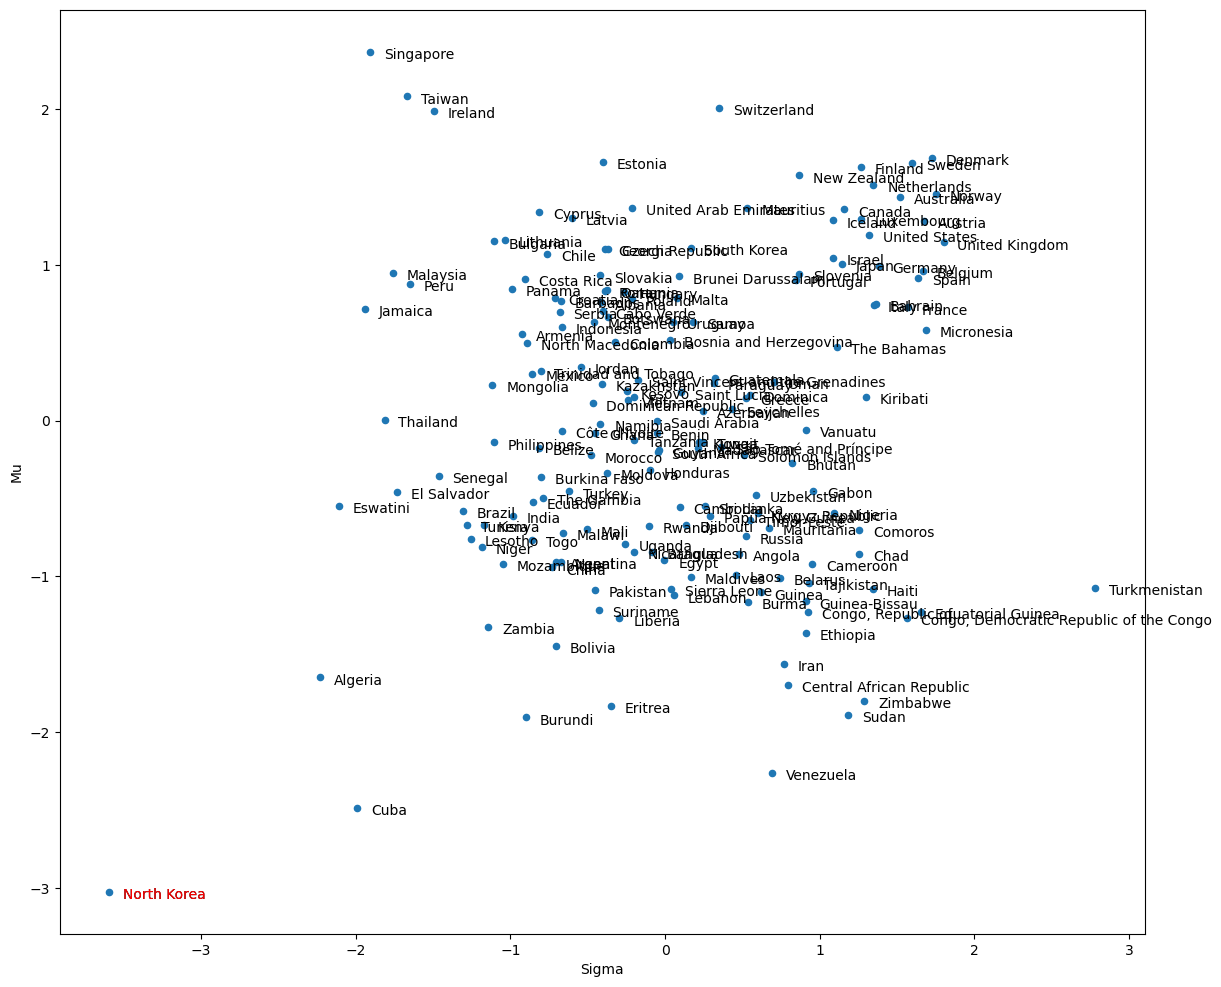

In [20]:
from matplotlib.pyplot import cm
fig, ax = plt.subplots()
cmap = cm.get_cmap('Spectral')
Sigma_Mu_df.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (14,12))
for k, v in Sigma_Mu_df.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='black')
for k, v in Sigma_Mu_df.iterrows():
    if (k=='North Korea'):
        plt.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='red')

In [21]:
df =Sigma_Mu_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])), # loose in both dimensions
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1])), # loose in first dimension and drow in second
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])) # loose in the second dimension 
                    ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1

PKF_1: ['Algeria', 'Eswatini', 'Jamaica', 'North Korea', 'Singapore']
PKF_2: ['Cuba', 'Malaysia', 'Taiwan ', 'Thailand']
PKF_3: ['El Salvador', 'Ireland', 'Peru', 'Switzerland']
PKF_4: ['Bulgaria', 'Cyprus', 'Denmark', 'Estonia', 'Lithuania', 'Mongolia', 'Senegal']
PKF_5: ['Brazil', 'Chile', 'Costa Rica', 'Finland', 'Latvia', 'Mauritius', 'New Zealand', 'Panama', 'Philippines', 'Sweden', 'United Arab Emirates']
PKF_6: ['Armenia', 'Canada', 'Croatia', 'Georgia', 'Iceland', 'India', 'Netherlands', 'Slovakia', 'South Korea ', 'Tunisia']
PKF_7: ['Australia', 'Barbados', 'Czech Republic', 'Kenya', 'Lesotho', 'Luxembourg', 'North Macedonia', 'Norway', 'Qatar', 'Romania', 'Serbia']
PKF_8: ['Albania', 'Austria', 'Brunei Darussalam', 'Hungary', 'Indonesia', 'Israel', 'Mexico', 'Montenegro', 'Niger', 'Slovenia', 'Trinidad and Tobago', 'United States']
PKF_9: ['Belize', 'Cabo Verde', "Côte d'Ivoire", 'Ecuador', 'Japan', 'Jordan', 'Malta', 'Mozambique', 'Poland', 'Portugal', 'Togo', 'United Kingdo

In [22]:
# Run optimization and get the local efficiences

m = Sigma_Mu_df.shape[0] # number of alternatives
m_f = len(PKF) # number of frontiers
local_ef = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
local_ef_new = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))

for unit in range (m):
    for fr in range (m_f):
        unit_sigmamu = np.array([Sigma_Mu_df.iloc[unit]]) # get the alternative unit
        
        Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
        for k in range(fr, m_f):
            for l in range(len(PKF[k])):
                Fr_list.append(PKF[k][l])
        Fr_sigmamu = np.array (Sigma_Mu_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
        
        
        M, resultado = optimize_PROM2_original(unit_sigmamu, Fr_sigmamu)
        local_ef[unit, fr] = M.obj()

        M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu)
        local_ef_new[unit, fr] = M_new.obj()
        
        print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')

alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 1, fronteira 3: resolvido.
alternative 1, fronteira 4: resolvido.
alternative 1, fronteira 5: resolvido.
alternative 1, fronteira 6: resolvido.
alternative 1, fronteira 7: resolvido.
alternative 1, fronteira 8: resolvido.
alternative 1, fronteira 9: resolvido.
alternative 1, fronteira 10: resolvido.
alternative 1, fronteira 11: resolvido.
alternative 1, fronteira 12: resolvido.
alternative 1, fronteira 13: resolvido.
alternative 1, fronteira 14: resolvido.
alternative 1, fronteira 15: resolvido.
alternative 1, fronteira 16: resolvido.
alternative 1, fronteira 17: resolvido.
alternative 1, fronteira 18: resolvido.
alternative 1, fronteira 19: resolvido.
alternative 1, fronteira 20: resolvido.
alternative 1, fronteira 21: resolvido.
alternative 1, fronteira 22: resolvido.
alternative 1, fronteira 23: resolvido.
alternative 1, fronteira 24: resolvido.
alternative 1, fronteira 25: resolvido.
alternati

alternative 8, fronteira 26: resolvido.
alternative 9, fronteira 1: resolvido.
alternative 9, fronteira 2: resolvido.
alternative 9, fronteira 3: resolvido.
alternative 9, fronteira 4: resolvido.
alternative 9, fronteira 5: resolvido.
alternative 9, fronteira 6: resolvido.
alternative 9, fronteira 7: resolvido.
alternative 9, fronteira 8: resolvido.
alternative 9, fronteira 9: resolvido.
alternative 9, fronteira 10: resolvido.
alternative 9, fronteira 11: resolvido.
alternative 9, fronteira 12: resolvido.
alternative 9, fronteira 13: resolvido.
alternative 9, fronteira 14: resolvido.
alternative 9, fronteira 15: resolvido.
alternative 9, fronteira 16: resolvido.
alternative 9, fronteira 17: resolvido.
alternative 9, fronteira 18: resolvido.
alternative 9, fronteira 19: resolvido.
alternative 9, fronteira 20: resolvido.
alternative 9, fronteira 21: resolvido.
alternative 9, fronteira 22: resolvido.
alternative 9, fronteira 23: resolvido.
alternative 9, fronteira 24: resolvido.
alternati

alternative 16, fronteira 21: resolvido.
alternative 16, fronteira 22: resolvido.
alternative 16, fronteira 23: resolvido.
alternative 16, fronteira 24: resolvido.
alternative 16, fronteira 25: resolvido.
alternative 16, fronteira 26: resolvido.
alternative 17, fronteira 1: resolvido.
alternative 17, fronteira 2: resolvido.
alternative 17, fronteira 3: resolvido.
alternative 17, fronteira 4: resolvido.
alternative 17, fronteira 5: resolvido.
alternative 17, fronteira 6: resolvido.
alternative 17, fronteira 7: resolvido.
alternative 17, fronteira 8: resolvido.
alternative 17, fronteira 9: resolvido.
alternative 17, fronteira 10: resolvido.
alternative 17, fronteira 11: resolvido.
alternative 17, fronteira 12: resolvido.
alternative 17, fronteira 13: resolvido.
alternative 17, fronteira 14: resolvido.
alternative 17, fronteira 15: resolvido.
alternative 17, fronteira 16: resolvido.
alternative 17, fronteira 17: resolvido.
alternative 17, fronteira 18: resolvido.
alternative 17, fronteira

alternative 24, fronteira 15: resolvido.
alternative 24, fronteira 16: resolvido.
alternative 24, fronteira 17: resolvido.
alternative 24, fronteira 18: resolvido.
alternative 24, fronteira 19: resolvido.
alternative 24, fronteira 20: resolvido.
alternative 24, fronteira 21: resolvido.
alternative 24, fronteira 22: resolvido.
alternative 24, fronteira 23: resolvido.
alternative 24, fronteira 24: resolvido.
alternative 24, fronteira 25: resolvido.
alternative 24, fronteira 26: resolvido.
alternative 25, fronteira 1: resolvido.
alternative 25, fronteira 2: resolvido.
alternative 25, fronteira 3: resolvido.
alternative 25, fronteira 4: resolvido.
alternative 25, fronteira 5: resolvido.
alternative 25, fronteira 6: resolvido.
alternative 25, fronteira 7: resolvido.
alternative 25, fronteira 8: resolvido.
alternative 25, fronteira 9: resolvido.
alternative 25, fronteira 10: resolvido.
alternative 25, fronteira 11: resolvido.
alternative 25, fronteira 12: resolvido.
alternative 25, fronteira

alternative 32, fronteira 9: resolvido.
alternative 32, fronteira 10: resolvido.
alternative 32, fronteira 11: resolvido.
alternative 32, fronteira 12: resolvido.
alternative 32, fronteira 13: resolvido.
alternative 32, fronteira 14: resolvido.
alternative 32, fronteira 15: resolvido.
alternative 32, fronteira 16: resolvido.
alternative 32, fronteira 17: resolvido.
alternative 32, fronteira 18: resolvido.
alternative 32, fronteira 19: resolvido.
alternative 32, fronteira 20: resolvido.
alternative 32, fronteira 21: resolvido.
alternative 32, fronteira 22: resolvido.
alternative 32, fronteira 23: resolvido.
alternative 32, fronteira 24: resolvido.
alternative 32, fronteira 25: resolvido.
alternative 32, fronteira 26: resolvido.
alternative 33, fronteira 1: resolvido.
alternative 33, fronteira 2: resolvido.
alternative 33, fronteira 3: resolvido.
alternative 33, fronteira 4: resolvido.
alternative 33, fronteira 5: resolvido.
alternative 33, fronteira 6: resolvido.
alternative 33, frontei

alternative 40, fronteira 3: resolvido.
alternative 40, fronteira 4: resolvido.
alternative 40, fronteira 5: resolvido.
alternative 40, fronteira 6: resolvido.
alternative 40, fronteira 7: resolvido.
alternative 40, fronteira 8: resolvido.
alternative 40, fronteira 9: resolvido.
alternative 40, fronteira 10: resolvido.
alternative 40, fronteira 11: resolvido.
alternative 40, fronteira 12: resolvido.
alternative 40, fronteira 13: resolvido.
alternative 40, fronteira 14: resolvido.
alternative 40, fronteira 15: resolvido.
alternative 40, fronteira 16: resolvido.
alternative 40, fronteira 17: resolvido.
alternative 40, fronteira 18: resolvido.
alternative 40, fronteira 19: resolvido.
alternative 40, fronteira 20: resolvido.
alternative 40, fronteira 21: resolvido.
alternative 40, fronteira 22: resolvido.
alternative 40, fronteira 23: resolvido.
alternative 40, fronteira 24: resolvido.
alternative 40, fronteira 25: resolvido.
alternative 40, fronteira 26: resolvido.
alternative 41, frontei

alternative 47, fronteira 23: resolvido.
alternative 47, fronteira 24: resolvido.
alternative 47, fronteira 25: resolvido.
alternative 47, fronteira 26: resolvido.
alternative 48, fronteira 1: resolvido.
alternative 48, fronteira 2: resolvido.
alternative 48, fronteira 3: resolvido.
alternative 48, fronteira 4: resolvido.
alternative 48, fronteira 5: resolvido.
alternative 48, fronteira 6: resolvido.
alternative 48, fronteira 7: resolvido.
alternative 48, fronteira 8: resolvido.
alternative 48, fronteira 9: resolvido.
alternative 48, fronteira 10: resolvido.
alternative 48, fronteira 11: resolvido.
alternative 48, fronteira 12: resolvido.
alternative 48, fronteira 13: resolvido.
alternative 48, fronteira 14: resolvido.
alternative 48, fronteira 15: resolvido.
alternative 48, fronteira 16: resolvido.
alternative 48, fronteira 17: resolvido.
alternative 48, fronteira 18: resolvido.
alternative 48, fronteira 19: resolvido.
alternative 48, fronteira 20: resolvido.
alternative 48, fronteira

alternative 55, fronteira 17: resolvido.
alternative 55, fronteira 18: resolvido.
alternative 55, fronteira 19: resolvido.
alternative 55, fronteira 20: resolvido.
alternative 55, fronteira 21: resolvido.
alternative 55, fronteira 22: resolvido.
alternative 55, fronteira 23: resolvido.
alternative 55, fronteira 24: resolvido.
alternative 55, fronteira 25: resolvido.
alternative 55, fronteira 26: resolvido.
alternative 56, fronteira 1: resolvido.
alternative 56, fronteira 2: resolvido.
alternative 56, fronteira 3: resolvido.
alternative 56, fronteira 4: resolvido.
alternative 56, fronteira 5: resolvido.
alternative 56, fronteira 6: resolvido.
alternative 56, fronteira 7: resolvido.
alternative 56, fronteira 8: resolvido.
alternative 56, fronteira 9: resolvido.
alternative 56, fronteira 10: resolvido.
alternative 56, fronteira 11: resolvido.
alternative 56, fronteira 12: resolvido.
alternative 56, fronteira 13: resolvido.
alternative 56, fronteira 14: resolvido.
alternative 56, fronteira

alternative 63, fronteira 11: resolvido.
alternative 63, fronteira 12: resolvido.
alternative 63, fronteira 13: resolvido.
alternative 63, fronteira 14: resolvido.
alternative 63, fronteira 15: resolvido.
alternative 63, fronteira 16: resolvido.
alternative 63, fronteira 17: resolvido.
alternative 63, fronteira 18: resolvido.
alternative 63, fronteira 19: resolvido.
alternative 63, fronteira 20: resolvido.
alternative 63, fronteira 21: resolvido.
alternative 63, fronteira 22: resolvido.
alternative 63, fronteira 23: resolvido.
alternative 63, fronteira 24: resolvido.
alternative 63, fronteira 25: resolvido.
alternative 63, fronteira 26: resolvido.
alternative 64, fronteira 1: resolvido.
alternative 64, fronteira 2: resolvido.
alternative 64, fronteira 3: resolvido.
alternative 64, fronteira 4: resolvido.
alternative 64, fronteira 5: resolvido.
alternative 64, fronteira 6: resolvido.
alternative 64, fronteira 7: resolvido.
alternative 64, fronteira 8: resolvido.
alternative 64, fronteir

alternative 71, fronteira 5: resolvido.
alternative 71, fronteira 6: resolvido.
alternative 71, fronteira 7: resolvido.
alternative 71, fronteira 8: resolvido.
alternative 71, fronteira 9: resolvido.
alternative 71, fronteira 10: resolvido.
alternative 71, fronteira 11: resolvido.
alternative 71, fronteira 12: resolvido.
alternative 71, fronteira 13: resolvido.
alternative 71, fronteira 14: resolvido.
alternative 71, fronteira 15: resolvido.
alternative 71, fronteira 16: resolvido.
alternative 71, fronteira 17: resolvido.
alternative 71, fronteira 18: resolvido.
alternative 71, fronteira 19: resolvido.
alternative 71, fronteira 20: resolvido.
alternative 71, fronteira 21: resolvido.
alternative 71, fronteira 22: resolvido.
alternative 71, fronteira 23: resolvido.
alternative 71, fronteira 24: resolvido.
alternative 71, fronteira 25: resolvido.
alternative 71, fronteira 26: resolvido.
alternative 72, fronteira 1: resolvido.
alternative 72, fronteira 2: resolvido.
alternative 72, frontei

alternative 78, fronteira 25: resolvido.
alternative 78, fronteira 26: resolvido.
alternative 79, fronteira 1: resolvido.
alternative 79, fronteira 2: resolvido.
alternative 79, fronteira 3: resolvido.
alternative 79, fronteira 4: resolvido.
alternative 79, fronteira 5: resolvido.
alternative 79, fronteira 6: resolvido.
alternative 79, fronteira 7: resolvido.
alternative 79, fronteira 8: resolvido.
alternative 79, fronteira 9: resolvido.
alternative 79, fronteira 10: resolvido.
alternative 79, fronteira 11: resolvido.
alternative 79, fronteira 12: resolvido.
alternative 79, fronteira 13: resolvido.
alternative 79, fronteira 14: resolvido.
alternative 79, fronteira 15: resolvido.
alternative 79, fronteira 16: resolvido.
alternative 79, fronteira 17: resolvido.
alternative 79, fronteira 18: resolvido.
alternative 79, fronteira 19: resolvido.
alternative 79, fronteira 20: resolvido.
alternative 79, fronteira 21: resolvido.
alternative 79, fronteira 22: resolvido.
alternative 79, fronteira

alternative 86, fronteira 19: resolvido.
alternative 86, fronteira 20: resolvido.
alternative 86, fronteira 21: resolvido.
alternative 86, fronteira 22: resolvido.
alternative 86, fronteira 23: resolvido.
alternative 86, fronteira 24: resolvido.
alternative 86, fronteira 25: resolvido.
alternative 86, fronteira 26: resolvido.
alternative 87, fronteira 1: resolvido.
alternative 87, fronteira 2: resolvido.
alternative 87, fronteira 3: resolvido.
alternative 87, fronteira 4: resolvido.
alternative 87, fronteira 5: resolvido.
alternative 87, fronteira 6: resolvido.
alternative 87, fronteira 7: resolvido.
alternative 87, fronteira 8: resolvido.
alternative 87, fronteira 9: resolvido.
alternative 87, fronteira 10: resolvido.
alternative 87, fronteira 11: resolvido.
alternative 87, fronteira 12: resolvido.
alternative 87, fronteira 13: resolvido.
alternative 87, fronteira 14: resolvido.
alternative 87, fronteira 15: resolvido.
alternative 87, fronteira 16: resolvido.
alternative 87, fronteira

alternative 94, fronteira 13: resolvido.
alternative 94, fronteira 14: resolvido.
alternative 94, fronteira 15: resolvido.
alternative 94, fronteira 16: resolvido.
alternative 94, fronteira 17: resolvido.
alternative 94, fronteira 18: resolvido.
alternative 94, fronteira 19: resolvido.
alternative 94, fronteira 20: resolvido.
alternative 94, fronteira 21: resolvido.
alternative 94, fronteira 22: resolvido.
alternative 94, fronteira 23: resolvido.
alternative 94, fronteira 24: resolvido.
alternative 94, fronteira 25: resolvido.
alternative 94, fronteira 26: resolvido.
alternative 95, fronteira 1: resolvido.
alternative 95, fronteira 2: resolvido.
alternative 95, fronteira 3: resolvido.
alternative 95, fronteira 4: resolvido.
alternative 95, fronteira 5: resolvido.
alternative 95, fronteira 6: resolvido.
alternative 95, fronteira 7: resolvido.
alternative 95, fronteira 8: resolvido.
alternative 95, fronteira 9: resolvido.
alternative 95, fronteira 10: resolvido.
alternative 95, fronteira

alternative 102, fronteira 6: resolvido.
alternative 102, fronteira 7: resolvido.
alternative 102, fronteira 8: resolvido.
alternative 102, fronteira 9: resolvido.
alternative 102, fronteira 10: resolvido.
alternative 102, fronteira 11: resolvido.
alternative 102, fronteira 12: resolvido.
alternative 102, fronteira 13: resolvido.
alternative 102, fronteira 14: resolvido.
alternative 102, fronteira 15: resolvido.
alternative 102, fronteira 16: resolvido.
alternative 102, fronteira 17: resolvido.
alternative 102, fronteira 18: resolvido.
alternative 102, fronteira 19: resolvido.
alternative 102, fronteira 20: resolvido.
alternative 102, fronteira 21: resolvido.
alternative 102, fronteira 22: resolvido.
alternative 102, fronteira 23: resolvido.
alternative 102, fronteira 24: resolvido.
alternative 102, fronteira 25: resolvido.
alternative 102, fronteira 26: resolvido.
alternative 103, fronteira 1: resolvido.
alternative 103, fronteira 2: resolvido.
alternative 103, fronteira 3: resolvido.

alternative 109, fronteira 21: resolvido.
alternative 109, fronteira 22: resolvido.
alternative 109, fronteira 23: resolvido.
alternative 109, fronteira 24: resolvido.
alternative 109, fronteira 25: resolvido.
alternative 109, fronteira 26: resolvido.
alternative 110, fronteira 1: resolvido.
alternative 110, fronteira 2: resolvido.
alternative 110, fronteira 3: resolvido.
alternative 110, fronteira 4: resolvido.
alternative 110, fronteira 5: resolvido.
alternative 110, fronteira 6: resolvido.
alternative 110, fronteira 7: resolvido.
alternative 110, fronteira 8: resolvido.
alternative 110, fronteira 9: resolvido.
alternative 110, fronteira 10: resolvido.
alternative 110, fronteira 11: resolvido.
alternative 110, fronteira 12: resolvido.
alternative 110, fronteira 13: resolvido.
alternative 110, fronteira 14: resolvido.
alternative 110, fronteira 15: resolvido.
alternative 110, fronteira 16: resolvido.
alternative 110, fronteira 17: resolvido.
alternative 110, fronteira 18: resolvido.
a

alternative 117, fronteira 10: resolvido.
alternative 117, fronteira 11: resolvido.
alternative 117, fronteira 12: resolvido.
alternative 117, fronteira 13: resolvido.
alternative 117, fronteira 14: resolvido.
alternative 117, fronteira 15: resolvido.
alternative 117, fronteira 16: resolvido.
alternative 117, fronteira 17: resolvido.
alternative 117, fronteira 18: resolvido.
alternative 117, fronteira 19: resolvido.
alternative 117, fronteira 20: resolvido.
alternative 117, fronteira 21: resolvido.
alternative 117, fronteira 22: resolvido.
alternative 117, fronteira 23: resolvido.
alternative 117, fronteira 24: resolvido.
alternative 117, fronteira 25: resolvido.
alternative 117, fronteira 26: resolvido.
alternative 118, fronteira 1: resolvido.
alternative 118, fronteira 2: resolvido.
alternative 118, fronteira 3: resolvido.
alternative 118, fronteira 4: resolvido.
alternative 118, fronteira 5: resolvido.
alternative 118, fronteira 6: resolvido.
alternative 118, fronteira 7: resolvido.

alternative 124, fronteira 25: resolvido.
alternative 124, fronteira 26: resolvido.
alternative 125, fronteira 1: resolvido.
alternative 125, fronteira 2: resolvido.
alternative 125, fronteira 3: resolvido.
alternative 125, fronteira 4: resolvido.
alternative 125, fronteira 5: resolvido.
alternative 125, fronteira 6: resolvido.
alternative 125, fronteira 7: resolvido.
alternative 125, fronteira 8: resolvido.
alternative 125, fronteira 9: resolvido.
alternative 125, fronteira 10: resolvido.
alternative 125, fronteira 11: resolvido.
alternative 125, fronteira 12: resolvido.
alternative 125, fronteira 13: resolvido.
alternative 125, fronteira 14: resolvido.
alternative 125, fronteira 15: resolvido.
alternative 125, fronteira 16: resolvido.
alternative 125, fronteira 17: resolvido.
alternative 125, fronteira 18: resolvido.
alternative 125, fronteira 19: resolvido.
alternative 125, fronteira 20: resolvido.
alternative 125, fronteira 21: resolvido.
alternative 125, fronteira 22: resolvido.
a

alternative 132, fronteira 14: resolvido.
alternative 132, fronteira 15: resolvido.
alternative 132, fronteira 16: resolvido.
alternative 132, fronteira 17: resolvido.
alternative 132, fronteira 18: resolvido.
alternative 132, fronteira 19: resolvido.
alternative 132, fronteira 20: resolvido.
alternative 132, fronteira 21: resolvido.
alternative 132, fronteira 22: resolvido.
alternative 132, fronteira 23: resolvido.
alternative 132, fronteira 24: resolvido.
alternative 132, fronteira 25: resolvido.
alternative 132, fronteira 26: resolvido.
alternative 133, fronteira 1: resolvido.
alternative 133, fronteira 2: resolvido.
alternative 133, fronteira 3: resolvido.
alternative 133, fronteira 4: resolvido.
alternative 133, fronteira 5: resolvido.
alternative 133, fronteira 6: resolvido.
alternative 133, fronteira 7: resolvido.
alternative 133, fronteira 8: resolvido.
alternative 133, fronteira 9: resolvido.
alternative 133, fronteira 10: resolvido.
alternative 133, fronteira 11: resolvido.
a

alternative 140, fronteira 3: resolvido.
alternative 140, fronteira 4: resolvido.
alternative 140, fronteira 5: resolvido.
alternative 140, fronteira 6: resolvido.
alternative 140, fronteira 7: resolvido.
alternative 140, fronteira 8: resolvido.
alternative 140, fronteira 9: resolvido.
alternative 140, fronteira 10: resolvido.
alternative 140, fronteira 11: resolvido.
alternative 140, fronteira 12: resolvido.
alternative 140, fronteira 13: resolvido.
alternative 140, fronteira 14: resolvido.
alternative 140, fronteira 15: resolvido.
alternative 140, fronteira 16: resolvido.
alternative 140, fronteira 17: resolvido.
alternative 140, fronteira 18: resolvido.
alternative 140, fronteira 19: resolvido.
alternative 140, fronteira 20: resolvido.
alternative 140, fronteira 21: resolvido.
alternative 140, fronteira 22: resolvido.
alternative 140, fronteira 23: resolvido.
alternative 140, fronteira 24: resolvido.
alternative 140, fronteira 25: resolvido.
alternative 140, fronteira 26: resolvido.

alternative 147, fronteira 18: resolvido.
alternative 147, fronteira 19: resolvido.
alternative 147, fronteira 20: resolvido.
alternative 147, fronteira 21: resolvido.
alternative 147, fronteira 22: resolvido.
alternative 147, fronteira 23: resolvido.
alternative 147, fronteira 24: resolvido.
alternative 147, fronteira 25: resolvido.
alternative 147, fronteira 26: resolvido.
alternative 148, fronteira 1: resolvido.
alternative 148, fronteira 2: resolvido.
alternative 148, fronteira 3: resolvido.
alternative 148, fronteira 4: resolvido.
alternative 148, fronteira 5: resolvido.
alternative 148, fronteira 6: resolvido.
alternative 148, fronteira 7: resolvido.
alternative 148, fronteira 8: resolvido.
alternative 148, fronteira 9: resolvido.
alternative 148, fronteira 10: resolvido.
alternative 148, fronteira 11: resolvido.
alternative 148, fronteira 12: resolvido.
alternative 148, fronteira 13: resolvido.
alternative 148, fronteira 14: resolvido.
alternative 148, fronteira 15: resolvido.
a

alternative 155, fronteira 7: resolvido.
alternative 155, fronteira 8: resolvido.
alternative 155, fronteira 9: resolvido.
alternative 155, fronteira 10: resolvido.
alternative 155, fronteira 11: resolvido.
alternative 155, fronteira 12: resolvido.
alternative 155, fronteira 13: resolvido.
alternative 155, fronteira 14: resolvido.
alternative 155, fronteira 15: resolvido.
alternative 155, fronteira 16: resolvido.
alternative 155, fronteira 17: resolvido.
alternative 155, fronteira 18: resolvido.
alternative 155, fronteira 19: resolvido.
alternative 155, fronteira 20: resolvido.
alternative 155, fronteira 21: resolvido.
alternative 155, fronteira 22: resolvido.
alternative 155, fronteira 23: resolvido.
alternative 155, fronteira 24: resolvido.
alternative 155, fronteira 25: resolvido.
alternative 155, fronteira 26: resolvido.
alternative 156, fronteira 1: resolvido.
alternative 156, fronteira 2: resolvido.
alternative 156, fronteira 3: resolvido.
alternative 156, fronteira 4: resolvido.

alternative 162, fronteira 22: resolvido.
alternative 162, fronteira 23: resolvido.
alternative 162, fronteira 24: resolvido.
alternative 162, fronteira 25: resolvido.
alternative 162, fronteira 26: resolvido.
alternative 163, fronteira 1: resolvido.
alternative 163, fronteira 2: resolvido.
alternative 163, fronteira 3: resolvido.
alternative 163, fronteira 4: resolvido.
alternative 163, fronteira 5: resolvido.
alternative 163, fronteira 6: resolvido.
alternative 163, fronteira 7: resolvido.
alternative 163, fronteira 8: resolvido.
alternative 163, fronteira 9: resolvido.
alternative 163, fronteira 10: resolvido.
alternative 163, fronteira 11: resolvido.
alternative 163, fronteira 12: resolvido.
alternative 163, fronteira 13: resolvido.
alternative 163, fronteira 14: resolvido.
alternative 163, fronteira 15: resolvido.
alternative 163, fronteira 16: resolvido.
alternative 163, fronteira 17: resolvido.
alternative 163, fronteira 18: resolvido.
alternative 163, fronteira 19: resolvido.
a

alternative 170, fronteira 11: resolvido.
alternative 170, fronteira 12: resolvido.
alternative 170, fronteira 13: resolvido.
alternative 170, fronteira 14: resolvido.
alternative 170, fronteira 15: resolvido.
alternative 170, fronteira 16: resolvido.
alternative 170, fronteira 17: resolvido.
alternative 170, fronteira 18: resolvido.
alternative 170, fronteira 19: resolvido.
alternative 170, fronteira 20: resolvido.
alternative 170, fronteira 21: resolvido.
alternative 170, fronteira 22: resolvido.
alternative 170, fronteira 23: resolvido.
alternative 170, fronteira 24: resolvido.
alternative 170, fronteira 25: resolvido.
alternative 170, fronteira 26: resolvido.
alternative 171, fronteira 1: resolvido.
alternative 171, fronteira 2: resolvido.
alternative 171, fronteira 3: resolvido.
alternative 171, fronteira 4: resolvido.
alternative 171, fronteira 5: resolvido.
alternative 171, fronteira 6: resolvido.
alternative 171, fronteira 7: resolvido.
alternative 171, fronteira 8: resolvido.


In [23]:
# Print local efficiencies

pd.DataFrame(local_ef, columns = ['$PKF_' + str(i) +'$' for i in range(len(PKF))], index=dados.index)

,$PKF_0$,$PKF_1$,$PKF_2$,$PKF_3$,$PKF_4$,$PKF_5$,$PKF_6$,$PKF_7$,$PKF_8$,$PKF_9$,...,$PKF_16$,$PKF_17$,$PKF_18$,$PKF_19$,$PKF_20$,$PKF_21$,$PKF_22$,$PKF_23$,$PKF_24$,$PKF_25$
Albania,-1.520645,-1.257331,-1.100668,-0.516709,-0.351911,-0.161974,-0.140043,0.000000,0.044311,0.085788,...,0.895830,0.928505,0.980927,1.128081,1.257074,1.380661,1.539263,1.635185,1.839966,2.012009
Algeria,-0.709206,0.279114,0.498383,0.769422,0.927633,0.952838,0.975875,1.046362,1.089714,1.332266,...,2.227519,2.269213,2.291018,2.691822,2.769424,2.851992,2.927131,3.001441,3.026425,3.414579
Angola,-2.583902,-2.203271,-2.079198,-1.662348,-1.508991,-1.404802,-1.363046,-1.266247,-1.097567,-1.045718,...,-0.362077,-0.293489,-0.204375,0.000000,0.083978,0.154760,0.261681,0.389913,0.431288,0.829723
Argentina,-1.697292,-1.107448,-0.997189,-0.720320,-0.552547,-0.500861,-0.462565,-0.395824,-0.260926,-0.126987,...,0.697544,0.739238,0.761043,1.161847,1.239448,1.322017,1.397156,1.471466,1.496450,1.884604
Armenia,-1.178957,-0.799955,-0.675430,-0.257858,-0.104620,0.000000,0.043993,0.140260,0.308202,0.359835,...,1.043122,1.112219,1.201323,1.404865,1.487499,1.558470,1.664592,1.794851,1.836031,2.236082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,-2.427128,-2.140730,-2.049770,-1.548388,-1.385327,-1.186976,-1.177617,-0.947954,-0.882597,-0.812863,...,0.077289,0.109964,0.162386,0.213691,0.392420,0.532040,0.643790,0.796702,1.019554,1.170939
Venezuela,-3.084883,-2.502073,-2.391974,-2.109723,-1.942421,-1.889018,-1.850698,-1.783862,-1.648510,-1.521774,...,-0.699612,-0.657919,-0.636113,-0.235310,-0.157708,-0.075139,0.000000,0.074309,0.099294,0.487448
Vietnam,-1.802615,-1.465737,-1.329509,-0.893293,-0.733998,-0.561308,-0.525522,-0.442999,-0.294133,-0.248107,...,0.426016,0.508293,0.606519,0.779148,0.827026,0.902885,1.081391,1.171716,1.308442,1.648990
Zambia,-1.461245,-0.721233,-0.591331,-0.320293,-0.162081,-0.136876,-0.113839,-0.043352,0.000000,0.262697,...,1.137805,1.179499,1.201304,1.602108,1.679710,1.762278,1.837417,1.911727,1.936711,2.324865


In [24]:
global_ef = np.sum(local_ef, axis = 1)
global_ef = (global_ef - global_ef.min()) /(global_ef.max() - global_ef.min())

results = pd.DataFrame({"Global Efficiency": global_ef}, index = Sigma_Mu_df.index)
results = results.assign(Position = results.rank(ascending=False))
results

,Global Efficiency,Position
Albania,0.441675,70.0
Algeria,0.712548,4.0
Angola,0.180584,152.0
Argentina,0.395635,92.0
Armenia,0.483051,48.0
...,...,...
Vanuatu,0.247834,141.0
Venezuela,0.095629,165.0
Vietnam,0.352170,107.0
Zambia,0.481633,49.0


In [25]:
results.to_excel("Ranking_Heritage_PROMETHEEScoring.xlsx")

MODIFIED MODEL 1

In [26]:
mu_net = np.mean(Net_Flows, axis=1)
sigma_net = np.std(Net_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_net,"Mu": mu_net}, index=dados.index)
Sigma_Mu_df

,Sigma,Mu
Albania,0.112915,0.246629
Algeria,0.051547,-0.536134
Angola,0.142941,-0.278834
Argentina,0.103160,-0.294534
Armenia,0.095627,0.180330
...,...,...
Vanuatu,0.157595,-0.019431
Venezuela,0.150293,-0.735625
Vietnam,0.118764,0.042194
Zambia,0.088308,-0.429892


In [27]:
Sigma_Mu_df = StandardScaler().fit_transform(Sigma_Mu_df)
Sigma_Mu_df = pd.DataFrame(Sigma_Mu_df, columns=['Sigma', 'Mu'], index = dados.index)
Sigma_Mu_df

,Sigma,Mu
Albania,-0.413738,0.758760
Algeria,-2.232861,-1.649429
Angola,0.476333,-0.857841
Argentina,-0.702886,-0.906141
Armenia,-0.926206,0.554791
...,...,...
Vanuatu,0.910712,-0.059781
Venezuela,0.694270,-2.263168
Vietnam,-0.240366,0.129810
Zambia,-1.143147,-1.322574


C:\Users\igor2\AppData\Local\Temp\ipykernel_132\500954172.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral')


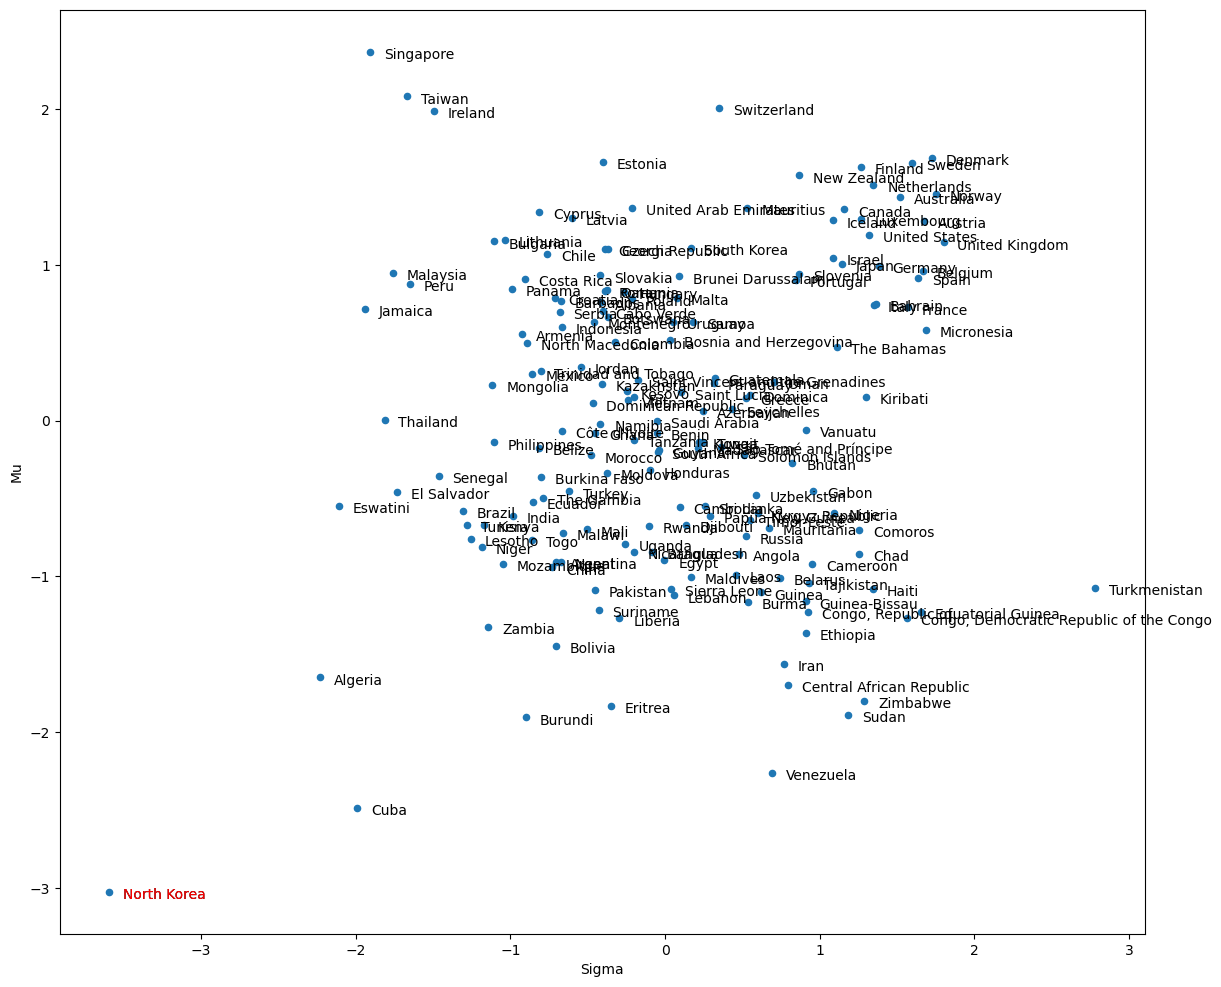

In [29]:
from matplotlib.pyplot import cm
fig, ax = plt.subplots()
cmap = cm.get_cmap('Spectral')
Sigma_Mu_df.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (14,12))
for k, v in Sigma_Mu_df.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='black')
for k, v in Sigma_Mu_df.iterrows():
    if (k=='North Korea'):
        plt.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='red')

In [30]:
df =Sigma_Mu_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                ((df.loc[idx][0] < comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])), # loose in both dimensions
                ((df.loc[idx][0] < comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1])), # loose in first dimension and drow in second
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])) # loose in the second dimension 
                    ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1

PKF_1: ['Denmark', 'Norway', 'Singapore', 'Switzerland', 'Taiwan ', 'Turkmenistan', 'United Kingdom']
PKF_2: ['Austria', 'Estonia', 'Ireland', 'Micronesia', 'Sweden']
PKF_3: ['Australia', 'Belgium', 'Finland', 'Netherlands']
PKF_4: ['Canada', 'Equatorial Guinea', 'Germany', 'Luxembourg', 'New Zealand', 'Spain', 'United States']
PKF_5: ['Bahrain', 'France', 'Iceland', 'Japan', 'Mauritius']
PKF_6: ['Congo, Democratic Republic of the Congo', 'Israel', 'Italy', 'South Korea ', 'United Arab Emirates']
PKF_7: ['Cyprus', 'Czech Republic', 'Georgia', 'Haiti', 'Kiribati', 'Latvia', 'Slovenia', 'The Bahamas']
PKF_8: ['Brunei Darussalam', 'Chad', 'Chile', 'Comoros', 'Gabon', 'Lithuania', 'Nigeria', 'Portugal', 'Slovakia', 'Vanuatu', 'Zimbabwe']
PKF_9: ['Bhutan', 'Bulgaria', 'Cameroon', 'Costa Rica', 'Guatemala', 'Hungary', 'Malta', 'Oman', 'Qatar', 'Samoa', 'Sudan']
PKF_10: ['Belarus', 'Dominica', 'Kyrgyz Republic', 'Malaysia', 'Mauritania', 'Panama', 'Paraguay', 'Peru', 'Poland', 'Romania', 'Taj

In [31]:
m = Sigma_Mu_df.shape[0] # number of alternatives
m_f = len(PKF) # number of frontiers
local_ef = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
local_ef_new = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))

for unit in range (m):
    for fr in range (m_f):
        unit_sigmamu = np.array([Sigma_Mu_df.iloc[unit]]) # get the alternative unit
        
        Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
        for k in range(fr, m_f):
            for l in range(len(PKF[k])):
                Fr_list.append(PKF[k][l])
        Fr_sigmamu = np.array (Sigma_Mu_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
        
        
        M, resultado = optimize_PROM2_original_positive_beta(unit_sigmamu, Fr_sigmamu)
        local_ef[unit, fr] = M.obj()

        M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu)
        local_ef_new[unit, fr] = M_new.obj()
        
        print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')

alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 1, fronteira 3: resolvido.
alternative 1, fronteira 4: resolvido.
alternative 1, fronteira 5: resolvido.
alternative 1, fronteira 6: resolvido.
alternative 1, fronteira 7: resolvido.
alternative 1, fronteira 8: resolvido.
alternative 1, fronteira 9: resolvido.
alternative 1, fronteira 10: resolvido.
alternative 1, fronteira 11: resolvido.
alternative 1, fronteira 12: resolvido.
alternative 1, fronteira 13: resolvido.
alternative 1, fronteira 14: resolvido.
alternative 1, fronteira 15: resolvido.
alternative 1, fronteira 16: resolvido.
alternative 1, fronteira 17: resolvido.
alternative 1, fronteira 18: resolvido.
alternative 1, fronteira 19: resolvido.
alternative 1, fronteira 20: resolvido.
alternative 1, fronteira 21: resolvido.
alternative 1, fronteira 22: resolvido.
alternative 1, fronteira 23: resolvido.
alternative 1, fronteira 24: resolvido.
alternative 1, fronteira 25: resolvido.
alternati

alternative 8, fronteira 19: resolvido.
alternative 8, fronteira 20: resolvido.
alternative 8, fronteira 21: resolvido.
alternative 8, fronteira 22: resolvido.
alternative 8, fronteira 23: resolvido.
alternative 8, fronteira 24: resolvido.
alternative 8, fronteira 25: resolvido.
alternative 8, fronteira 26: resolvido.
alternative 8, fronteira 27: resolvido.
alternative 9, fronteira 1: resolvido.
alternative 9, fronteira 2: resolvido.
alternative 9, fronteira 3: resolvido.
alternative 9, fronteira 4: resolvido.
alternative 9, fronteira 5: resolvido.
alternative 9, fronteira 6: resolvido.
alternative 9, fronteira 7: resolvido.
alternative 9, fronteira 8: resolvido.
alternative 9, fronteira 9: resolvido.
alternative 9, fronteira 10: resolvido.
alternative 9, fronteira 11: resolvido.
alternative 9, fronteira 12: resolvido.
alternative 9, fronteira 13: resolvido.
alternative 9, fronteira 14: resolvido.
alternative 9, fronteira 15: resolvido.
alternative 9, fronteira 16: resolvido.
alternati

alternative 16, fronteira 6: resolvido.
alternative 16, fronteira 7: resolvido.
alternative 16, fronteira 8: resolvido.
alternative 16, fronteira 9: resolvido.
alternative 16, fronteira 10: resolvido.
alternative 16, fronteira 11: resolvido.
alternative 16, fronteira 12: resolvido.
alternative 16, fronteira 13: resolvido.
alternative 16, fronteira 14: resolvido.
alternative 16, fronteira 15: resolvido.
alternative 16, fronteira 16: resolvido.
alternative 16, fronteira 17: resolvido.
alternative 16, fronteira 18: resolvido.
alternative 16, fronteira 19: resolvido.
alternative 16, fronteira 20: resolvido.
alternative 16, fronteira 21: resolvido.
alternative 16, fronteira 22: resolvido.
alternative 16, fronteira 23: resolvido.
alternative 16, fronteira 24: resolvido.
alternative 16, fronteira 25: resolvido.
alternative 16, fronteira 26: resolvido.
alternative 16, fronteira 27: resolvido.
alternative 17, fronteira 1: resolvido.
alternative 17, fronteira 2: resolvido.
alternative 17, fronte

alternative 23, fronteira 19: resolvido.
alternative 23, fronteira 20: resolvido.
alternative 23, fronteira 21: resolvido.
alternative 23, fronteira 22: resolvido.
alternative 23, fronteira 23: resolvido.
alternative 23, fronteira 24: resolvido.
alternative 23, fronteira 25: resolvido.
alternative 23, fronteira 26: resolvido.
alternative 23, fronteira 27: resolvido.
alternative 24, fronteira 1: resolvido.
alternative 24, fronteira 2: resolvido.
alternative 24, fronteira 3: resolvido.
alternative 24, fronteira 4: resolvido.
alternative 24, fronteira 5: resolvido.
alternative 24, fronteira 6: resolvido.
alternative 24, fronteira 7: resolvido.
alternative 24, fronteira 8: resolvido.
alternative 24, fronteira 9: resolvido.
alternative 24, fronteira 10: resolvido.
alternative 24, fronteira 11: resolvido.
alternative 24, fronteira 12: resolvido.
alternative 24, fronteira 13: resolvido.
alternative 24, fronteira 14: resolvido.
alternative 24, fronteira 15: resolvido.
alternative 24, fronteira

alternative 31, fronteira 5: resolvido.
alternative 31, fronteira 6: resolvido.
alternative 31, fronteira 7: resolvido.
alternative 31, fronteira 8: resolvido.
alternative 31, fronteira 9: resolvido.
alternative 31, fronteira 10: resolvido.
alternative 31, fronteira 11: resolvido.
alternative 31, fronteira 12: resolvido.
alternative 31, fronteira 13: resolvido.
alternative 31, fronteira 14: resolvido.
alternative 31, fronteira 15: resolvido.
alternative 31, fronteira 16: resolvido.
alternative 31, fronteira 17: resolvido.
alternative 31, fronteira 18: resolvido.
alternative 31, fronteira 19: resolvido.
alternative 31, fronteira 20: resolvido.
alternative 31, fronteira 21: resolvido.
alternative 31, fronteira 22: resolvido.
alternative 31, fronteira 23: resolvido.
alternative 31, fronteira 24: resolvido.
alternative 31, fronteira 25: resolvido.
alternative 31, fronteira 26: resolvido.
alternative 31, fronteira 27: resolvido.
alternative 32, fronteira 1: resolvido.
alternative 32, fronte

alternative 38, fronteira 18: resolvido.
alternative 38, fronteira 19: resolvido.
alternative 38, fronteira 20: resolvido.
alternative 38, fronteira 21: resolvido.
alternative 38, fronteira 22: resolvido.
alternative 38, fronteira 23: resolvido.
alternative 38, fronteira 24: resolvido.
alternative 38, fronteira 25: resolvido.
alternative 38, fronteira 26: resolvido.
alternative 38, fronteira 27: resolvido.
alternative 39, fronteira 1: resolvido.
alternative 39, fronteira 2: resolvido.
alternative 39, fronteira 3: resolvido.
alternative 39, fronteira 4: resolvido.
alternative 39, fronteira 5: resolvido.
alternative 39, fronteira 6: resolvido.
alternative 39, fronteira 7: resolvido.
alternative 39, fronteira 8: resolvido.
alternative 39, fronteira 9: resolvido.
alternative 39, fronteira 10: resolvido.
alternative 39, fronteira 11: resolvido.
alternative 39, fronteira 12: resolvido.
alternative 39, fronteira 13: resolvido.
alternative 39, fronteira 14: resolvido.
alternative 39, fronteira

alternative 46, fronteira 4: resolvido.
alternative 46, fronteira 5: resolvido.
alternative 46, fronteira 6: resolvido.
alternative 46, fronteira 7: resolvido.
alternative 46, fronteira 8: resolvido.
alternative 46, fronteira 9: resolvido.
alternative 46, fronteira 10: resolvido.
alternative 46, fronteira 11: resolvido.
alternative 46, fronteira 12: resolvido.
alternative 46, fronteira 13: resolvido.
alternative 46, fronteira 14: resolvido.
alternative 46, fronteira 15: resolvido.
alternative 46, fronteira 16: resolvido.
alternative 46, fronteira 17: resolvido.
alternative 46, fronteira 18: resolvido.
alternative 46, fronteira 19: resolvido.
alternative 46, fronteira 20: resolvido.
alternative 46, fronteira 21: resolvido.
alternative 46, fronteira 22: resolvido.
alternative 46, fronteira 23: resolvido.
alternative 46, fronteira 24: resolvido.
alternative 46, fronteira 25: resolvido.
alternative 46, fronteira 26: resolvido.
alternative 46, fronteira 27: resolvido.
alternative 47, fronte

alternative 53, fronteira 17: resolvido.
alternative 53, fronteira 18: resolvido.
alternative 53, fronteira 19: resolvido.
alternative 53, fronteira 20: resolvido.
alternative 53, fronteira 21: resolvido.
alternative 53, fronteira 22: resolvido.
alternative 53, fronteira 23: resolvido.
alternative 53, fronteira 24: resolvido.
alternative 53, fronteira 25: resolvido.
alternative 53, fronteira 26: resolvido.
alternative 53, fronteira 27: resolvido.
alternative 54, fronteira 1: resolvido.
alternative 54, fronteira 2: resolvido.
alternative 54, fronteira 3: resolvido.
alternative 54, fronteira 4: resolvido.
alternative 54, fronteira 5: resolvido.
alternative 54, fronteira 6: resolvido.
alternative 54, fronteira 7: resolvido.
alternative 54, fronteira 8: resolvido.
alternative 54, fronteira 9: resolvido.
alternative 54, fronteira 10: resolvido.
alternative 54, fronteira 11: resolvido.
alternative 54, fronteira 12: resolvido.
alternative 54, fronteira 13: resolvido.
alternative 54, fronteira

alternative 61, fronteira 3: resolvido.
alternative 61, fronteira 4: resolvido.
alternative 61, fronteira 5: resolvido.
alternative 61, fronteira 6: resolvido.
alternative 61, fronteira 7: resolvido.
alternative 61, fronteira 8: resolvido.
alternative 61, fronteira 9: resolvido.
alternative 61, fronteira 10: resolvido.
alternative 61, fronteira 11: resolvido.
alternative 61, fronteira 12: resolvido.
alternative 61, fronteira 13: resolvido.
alternative 61, fronteira 14: resolvido.
alternative 61, fronteira 15: resolvido.
alternative 61, fronteira 16: resolvido.
alternative 61, fronteira 17: resolvido.
alternative 61, fronteira 18: resolvido.
alternative 61, fronteira 19: resolvido.
alternative 61, fronteira 20: resolvido.
alternative 61, fronteira 21: resolvido.
alternative 61, fronteira 22: resolvido.
alternative 61, fronteira 23: resolvido.
alternative 61, fronteira 24: resolvido.
alternative 61, fronteira 25: resolvido.
alternative 61, fronteira 26: resolvido.
alternative 61, frontei

alternative 68, fronteira 16: resolvido.
alternative 68, fronteira 17: resolvido.
alternative 68, fronteira 18: resolvido.
alternative 68, fronteira 19: resolvido.
alternative 68, fronteira 20: resolvido.
alternative 68, fronteira 21: resolvido.
alternative 68, fronteira 22: resolvido.
alternative 68, fronteira 23: resolvido.
alternative 68, fronteira 24: resolvido.
alternative 68, fronteira 25: resolvido.
alternative 68, fronteira 26: resolvido.
alternative 68, fronteira 27: resolvido.
alternative 69, fronteira 1: resolvido.
alternative 69, fronteira 2: resolvido.
alternative 69, fronteira 3: resolvido.
alternative 69, fronteira 4: resolvido.
alternative 69, fronteira 5: resolvido.
alternative 69, fronteira 6: resolvido.
alternative 69, fronteira 7: resolvido.
alternative 69, fronteira 8: resolvido.
alternative 69, fronteira 9: resolvido.
alternative 69, fronteira 10: resolvido.
alternative 69, fronteira 11: resolvido.
alternative 69, fronteira 12: resolvido.
alternative 69, fronteira

alternative 76, fronteira 2: resolvido.
alternative 76, fronteira 3: resolvido.
alternative 76, fronteira 4: resolvido.
alternative 76, fronteira 5: resolvido.
alternative 76, fronteira 6: resolvido.
alternative 76, fronteira 7: resolvido.
alternative 76, fronteira 8: resolvido.
alternative 76, fronteira 9: resolvido.
alternative 76, fronteira 10: resolvido.
alternative 76, fronteira 11: resolvido.
alternative 76, fronteira 12: resolvido.
alternative 76, fronteira 13: resolvido.
alternative 76, fronteira 14: resolvido.
alternative 76, fronteira 15: resolvido.
alternative 76, fronteira 16: resolvido.
alternative 76, fronteira 17: resolvido.
alternative 76, fronteira 18: resolvido.
alternative 76, fronteira 19: resolvido.
alternative 76, fronteira 20: resolvido.
alternative 76, fronteira 21: resolvido.
alternative 76, fronteira 22: resolvido.
alternative 76, fronteira 23: resolvido.
alternative 76, fronteira 24: resolvido.
alternative 76, fronteira 25: resolvido.
alternative 76, fronteir

alternative 83, fronteira 15: resolvido.
alternative 83, fronteira 16: resolvido.
alternative 83, fronteira 17: resolvido.
alternative 83, fronteira 18: resolvido.
alternative 83, fronteira 19: resolvido.
alternative 83, fronteira 20: resolvido.
alternative 83, fronteira 21: resolvido.
alternative 83, fronteira 22: resolvido.
alternative 83, fronteira 23: resolvido.
alternative 83, fronteira 24: resolvido.
alternative 83, fronteira 25: resolvido.
alternative 83, fronteira 26: resolvido.
alternative 83, fronteira 27: resolvido.
alternative 84, fronteira 1: resolvido.
alternative 84, fronteira 2: resolvido.
alternative 84, fronteira 3: resolvido.
alternative 84, fronteira 4: resolvido.
alternative 84, fronteira 5: resolvido.
alternative 84, fronteira 6: resolvido.
alternative 84, fronteira 7: resolvido.
alternative 84, fronteira 8: resolvido.
alternative 84, fronteira 9: resolvido.
alternative 84, fronteira 10: resolvido.
alternative 84, fronteira 11: resolvido.
alternative 84, fronteira

alternative 91, fronteira 1: resolvido.
alternative 91, fronteira 2: resolvido.
alternative 91, fronteira 3: resolvido.
alternative 91, fronteira 4: resolvido.
alternative 91, fronteira 5: resolvido.
alternative 91, fronteira 6: resolvido.
alternative 91, fronteira 7: resolvido.
alternative 91, fronteira 8: resolvido.
alternative 91, fronteira 9: resolvido.
alternative 91, fronteira 10: resolvido.
alternative 91, fronteira 11: resolvido.
alternative 91, fronteira 12: resolvido.
alternative 91, fronteira 13: resolvido.
alternative 91, fronteira 14: resolvido.
alternative 91, fronteira 15: resolvido.
alternative 91, fronteira 16: resolvido.
alternative 91, fronteira 17: resolvido.
alternative 91, fronteira 18: resolvido.
alternative 91, fronteira 19: resolvido.
alternative 91, fronteira 20: resolvido.
alternative 91, fronteira 21: resolvido.
alternative 91, fronteira 22: resolvido.
alternative 91, fronteira 23: resolvido.
alternative 91, fronteira 24: resolvido.
alternative 91, fronteira

alternative 98, fronteira 14: resolvido.
alternative 98, fronteira 15: resolvido.
alternative 98, fronteira 16: resolvido.
alternative 98, fronteira 17: resolvido.
alternative 98, fronteira 18: resolvido.
alternative 98, fronteira 19: resolvido.
alternative 98, fronteira 20: resolvido.
alternative 98, fronteira 21: resolvido.
alternative 98, fronteira 22: resolvido.
alternative 98, fronteira 23: resolvido.
alternative 98, fronteira 24: resolvido.
alternative 98, fronteira 25: resolvido.
alternative 98, fronteira 26: resolvido.
alternative 98, fronteira 27: resolvido.
alternative 99, fronteira 1: resolvido.
alternative 99, fronteira 2: resolvido.
alternative 99, fronteira 3: resolvido.
alternative 99, fronteira 4: resolvido.
alternative 99, fronteira 5: resolvido.
alternative 99, fronteira 6: resolvido.
alternative 99, fronteira 7: resolvido.
alternative 99, fronteira 8: resolvido.
alternative 99, fronteira 9: resolvido.
alternative 99, fronteira 10: resolvido.
alternative 99, fronteira

alternative 105, fronteira 23: resolvido.
alternative 105, fronteira 24: resolvido.
alternative 105, fronteira 25: resolvido.
alternative 105, fronteira 26: resolvido.
alternative 105, fronteira 27: resolvido.
alternative 106, fronteira 1: resolvido.
alternative 106, fronteira 2: resolvido.
alternative 106, fronteira 3: resolvido.
alternative 106, fronteira 4: resolvido.
alternative 106, fronteira 5: resolvido.
alternative 106, fronteira 6: resolvido.
alternative 106, fronteira 7: resolvido.
alternative 106, fronteira 8: resolvido.
alternative 106, fronteira 9: resolvido.
alternative 106, fronteira 10: resolvido.
alternative 106, fronteira 11: resolvido.
alternative 106, fronteira 12: resolvido.
alternative 106, fronteira 13: resolvido.
alternative 106, fronteira 14: resolvido.
alternative 106, fronteira 15: resolvido.
alternative 106, fronteira 16: resolvido.
alternative 106, fronteira 17: resolvido.
alternative 106, fronteira 18: resolvido.
alternative 106, fronteira 19: resolvido.
a

alternative 113, fronteira 4: resolvido.
alternative 113, fronteira 5: resolvido.
alternative 113, fronteira 6: resolvido.
alternative 113, fronteira 7: resolvido.
alternative 113, fronteira 8: resolvido.
alternative 113, fronteira 9: resolvido.
alternative 113, fronteira 10: resolvido.
alternative 113, fronteira 11: resolvido.
alternative 113, fronteira 12: resolvido.
alternative 113, fronteira 13: resolvido.
alternative 113, fronteira 14: resolvido.
alternative 113, fronteira 15: resolvido.
alternative 113, fronteira 16: resolvido.
alternative 113, fronteira 17: resolvido.
alternative 113, fronteira 18: resolvido.
alternative 113, fronteira 19: resolvido.
alternative 113, fronteira 20: resolvido.
alternative 113, fronteira 21: resolvido.
alternative 113, fronteira 22: resolvido.
alternative 113, fronteira 23: resolvido.
alternative 113, fronteira 24: resolvido.
alternative 113, fronteira 25: resolvido.
alternative 113, fronteira 26: resolvido.
alternative 113, fronteira 27: resolvido

alternative 120, fronteira 12: resolvido.
alternative 120, fronteira 13: resolvido.
alternative 120, fronteira 14: resolvido.
alternative 120, fronteira 15: resolvido.
alternative 120, fronteira 16: resolvido.
alternative 120, fronteira 17: resolvido.
alternative 120, fronteira 18: resolvido.
alternative 120, fronteira 19: resolvido.
alternative 120, fronteira 20: resolvido.
alternative 120, fronteira 21: resolvido.
alternative 120, fronteira 22: resolvido.
alternative 120, fronteira 23: resolvido.
alternative 120, fronteira 24: resolvido.
alternative 120, fronteira 25: resolvido.
alternative 120, fronteira 26: resolvido.
alternative 120, fronteira 27: resolvido.
alternative 121, fronteira 1: resolvido.
alternative 121, fronteira 2: resolvido.
alternative 121, fronteira 3: resolvido.
alternative 121, fronteira 4: resolvido.
alternative 121, fronteira 5: resolvido.
alternative 121, fronteira 6: resolvido.
alternative 121, fronteira 7: resolvido.
alternative 121, fronteira 8: resolvido.


alternative 127, fronteira 20: resolvido.
alternative 127, fronteira 21: resolvido.
alternative 127, fronteira 22: resolvido.
alternative 127, fronteira 23: resolvido.
alternative 127, fronteira 24: resolvido.
alternative 127, fronteira 25: resolvido.
alternative 127, fronteira 26: resolvido.
alternative 127, fronteira 27: resolvido.
alternative 128, fronteira 1: resolvido.
alternative 128, fronteira 2: resolvido.
alternative 128, fronteira 3: resolvido.
alternative 128, fronteira 4: resolvido.
alternative 128, fronteira 5: resolvido.
alternative 128, fronteira 6: resolvido.
alternative 128, fronteira 7: resolvido.
alternative 128, fronteira 8: resolvido.
alternative 128, fronteira 9: resolvido.
alternative 128, fronteira 10: resolvido.
alternative 128, fronteira 11: resolvido.
alternative 128, fronteira 12: resolvido.
alternative 128, fronteira 13: resolvido.
alternative 128, fronteira 14: resolvido.
alternative 128, fronteira 15: resolvido.
alternative 128, fronteira 16: resolvido.
a

alternative 135, fronteira 1: resolvido.
alternative 135, fronteira 2: resolvido.
alternative 135, fronteira 3: resolvido.
alternative 135, fronteira 4: resolvido.
alternative 135, fronteira 5: resolvido.
alternative 135, fronteira 6: resolvido.
alternative 135, fronteira 7: resolvido.
alternative 135, fronteira 8: resolvido.
alternative 135, fronteira 9: resolvido.
alternative 135, fronteira 10: resolvido.
alternative 135, fronteira 11: resolvido.
alternative 135, fronteira 12: resolvido.
alternative 135, fronteira 13: resolvido.
alternative 135, fronteira 14: resolvido.
alternative 135, fronteira 15: resolvido.
alternative 135, fronteira 16: resolvido.
alternative 135, fronteira 17: resolvido.
alternative 135, fronteira 18: resolvido.
alternative 135, fronteira 19: resolvido.
alternative 135, fronteira 20: resolvido.
alternative 135, fronteira 21: resolvido.
alternative 135, fronteira 22: resolvido.
alternative 135, fronteira 23: resolvido.
alternative 135, fronteira 24: resolvido.
a

alternative 142, fronteira 9: resolvido.
alternative 142, fronteira 10: resolvido.
alternative 142, fronteira 11: resolvido.
alternative 142, fronteira 12: resolvido.
alternative 142, fronteira 13: resolvido.
alternative 142, fronteira 14: resolvido.
alternative 142, fronteira 15: resolvido.
alternative 142, fronteira 16: resolvido.
alternative 142, fronteira 17: resolvido.
alternative 142, fronteira 18: resolvido.
alternative 142, fronteira 19: resolvido.
alternative 142, fronteira 20: resolvido.
alternative 142, fronteira 21: resolvido.
alternative 142, fronteira 22: resolvido.
alternative 142, fronteira 23: resolvido.
alternative 142, fronteira 24: resolvido.
alternative 142, fronteira 25: resolvido.
alternative 142, fronteira 26: resolvido.
alternative 142, fronteira 27: resolvido.
alternative 143, fronteira 1: resolvido.
alternative 143, fronteira 2: resolvido.
alternative 143, fronteira 3: resolvido.
alternative 143, fronteira 4: resolvido.
alternative 143, fronteira 5: resolvido

alternative 149, fronteira 17: resolvido.
alternative 149, fronteira 18: resolvido.
alternative 149, fronteira 19: resolvido.
alternative 149, fronteira 20: resolvido.
alternative 149, fronteira 21: resolvido.
alternative 149, fronteira 22: resolvido.
alternative 149, fronteira 23: resolvido.
alternative 149, fronteira 24: resolvido.
alternative 149, fronteira 25: resolvido.
alternative 149, fronteira 26: resolvido.
alternative 149, fronteira 27: resolvido.
alternative 150, fronteira 1: resolvido.
alternative 150, fronteira 2: resolvido.
alternative 150, fronteira 3: resolvido.
alternative 150, fronteira 4: resolvido.
alternative 150, fronteira 5: resolvido.
alternative 150, fronteira 6: resolvido.
alternative 150, fronteira 7: resolvido.
alternative 150, fronteira 8: resolvido.
alternative 150, fronteira 9: resolvido.
alternative 150, fronteira 10: resolvido.
alternative 150, fronteira 11: resolvido.
alternative 150, fronteira 12: resolvido.
alternative 150, fronteira 13: resolvido.
a

alternative 156, fronteira 25: resolvido.
alternative 156, fronteira 26: resolvido.
alternative 156, fronteira 27: resolvido.
alternative 157, fronteira 1: resolvido.
alternative 157, fronteira 2: resolvido.
alternative 157, fronteira 3: resolvido.
alternative 157, fronteira 4: resolvido.
alternative 157, fronteira 5: resolvido.
alternative 157, fronteira 6: resolvido.
alternative 157, fronteira 7: resolvido.
alternative 157, fronteira 8: resolvido.
alternative 157, fronteira 9: resolvido.
alternative 157, fronteira 10: resolvido.
alternative 157, fronteira 11: resolvido.
alternative 157, fronteira 12: resolvido.
alternative 157, fronteira 13: resolvido.
alternative 157, fronteira 14: resolvido.
alternative 157, fronteira 15: resolvido.
alternative 157, fronteira 16: resolvido.
alternative 157, fronteira 17: resolvido.
alternative 157, fronteira 18: resolvido.
alternative 157, fronteira 19: resolvido.
alternative 157, fronteira 20: resolvido.
alternative 157, fronteira 21: resolvido.
a

alternative 164, fronteira 6: resolvido.
alternative 164, fronteira 7: resolvido.
alternative 164, fronteira 8: resolvido.
alternative 164, fronteira 9: resolvido.
alternative 164, fronteira 10: resolvido.
alternative 164, fronteira 11: resolvido.
alternative 164, fronteira 12: resolvido.
alternative 164, fronteira 13: resolvido.
alternative 164, fronteira 14: resolvido.
alternative 164, fronteira 15: resolvido.
alternative 164, fronteira 16: resolvido.
alternative 164, fronteira 17: resolvido.
alternative 164, fronteira 18: resolvido.
alternative 164, fronteira 19: resolvido.
alternative 164, fronteira 20: resolvido.
alternative 164, fronteira 21: resolvido.
alternative 164, fronteira 22: resolvido.
alternative 164, fronteira 23: resolvido.
alternative 164, fronteira 24: resolvido.
alternative 164, fronteira 25: resolvido.
alternative 164, fronteira 26: resolvido.
alternative 164, fronteira 27: resolvido.
alternative 165, fronteira 1: resolvido.
alternative 165, fronteira 2: resolvido

alternative 171, fronteira 14: resolvido.
alternative 171, fronteira 15: resolvido.
alternative 171, fronteira 16: resolvido.
alternative 171, fronteira 17: resolvido.
alternative 171, fronteira 18: resolvido.
alternative 171, fronteira 19: resolvido.
alternative 171, fronteira 20: resolvido.
alternative 171, fronteira 21: resolvido.
alternative 171, fronteira 22: resolvido.
alternative 171, fronteira 23: resolvido.
alternative 171, fronteira 24: resolvido.
alternative 171, fronteira 25: resolvido.
alternative 171, fronteira 26: resolvido.
alternative 171, fronteira 27: resolvido.
alternative 172, fronteira 1: resolvido.
alternative 172, fronteira 2: resolvido.
alternative 172, fronteira 3: resolvido.
alternative 172, fronteira 4: resolvido.
alternative 172, fronteira 5: resolvido.
alternative 172, fronteira 6: resolvido.
alternative 172, fronteira 7: resolvido.
alternative 172, fronteira 8: resolvido.
alternative 172, fronteira 9: resolvido.
alternative 172, fronteira 10: resolvido.
a

In [34]:
global_ef = np.sum(local_ef, axis = 1)
global_ef = (global_ef - global_ef.min()) /(global_ef.max() - global_ef.min())
results_heritage = pd.DataFrame({"Global Efficiency": global_ef}, index = Sigma_Mu_df.index)
results_heritage = results_heritage.assign(Position = results_heritage.rank(ascending=False))
results_heritage

,Global Efficiency,Position
Albania,0.658258,72.0
Algeria,0.244334,174.0
Angola,0.605957,103.0
Argentina,0.431914,161.0
Armenia,0.617517,99.0
...,...,...
Vanuatu,0.689266,53.0
Venezuela,0.630135,89.0
Vietnam,0.570838,120.0
Zambia,0.355277,173.0


In [35]:
results_heritage.to_excel("Ranking_Heritage_PROMETHEEScoring_Modelo_Modificado.xlsx")

Alternativa Turkmenistan
  foi para a primeira posição!! Na ordenação original estava na posição 151.

Vamos ver o comportamento dessa alternativa.

In [36]:
Net_Flows.shape

(176, 10000)

In [37]:
Net_Flows_df = pd.DataFrame(Net_Flows, columns = [s for s in range(n_simulations)], index = dados.index)
Net_Flows_df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
Albania,0.266376,0.232473,0.211784,0.247603,0.415324,0.159872,0.355536,0.245150,0.227569,0.499389,...,0.323634,0.353739,0.236742,0.163246,0.142478,0.179673,0.378066,0.294844,0.240625,0.165661
Algeria,-0.591237,-0.557451,-0.502572,-0.599785,-0.548024,-0.555694,-0.505488,-0.547342,-0.478253,-0.543518,...,-0.624633,-0.600448,-0.530668,-0.558577,-0.519311,-0.480651,-0.482011,-0.544188,-0.475926,-0.544384
Angola,-0.239431,-0.154064,-0.222754,-0.267692,-0.270640,-0.103320,-0.181302,-0.400195,-0.230588,-0.036174,...,-0.471788,-0.087707,-0.206536,-0.325426,-0.112988,-0.289249,-0.451240,-0.264441,-0.323604,-0.466757
Argentina,-0.145926,-0.174656,-0.319963,-0.235599,-0.255595,-0.152383,-0.299160,-0.086406,-0.403544,-0.381335,...,-0.240147,-0.235303,-0.195211,-0.193554,-0.305134,-0.350374,-0.352563,-0.248262,-0.393655,-0.317567
Armenia,0.395676,0.205168,0.117221,0.307715,0.146457,0.128486,0.181553,0.271653,0.159261,0.400423,...,0.326057,0.271776,0.179541,0.121428,0.331603,0.118518,0.192544,0.122134,0.215258,0.052099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.054593,-0.049003,-0.124218,0.071440,-0.156114,-0.031910,0.045751,-0.112085,-0.163039,0.310444,...,0.044920,0.056718,-0.028116,0.087452,0.324709,-0.380146,-0.092807,-0.079154,0.029505,-0.101635
Venezuela,-0.764538,-0.748859,-0.557987,-0.601186,-0.678636,-0.530457,-0.805638,-0.890472,-0.768119,-0.647166,...,-0.877621,-0.738338,-0.555008,-0.777284,-0.625036,-0.671514,-0.851448,-0.630224,-0.761140,-0.956223
Vietnam,-0.055539,0.098550,0.205887,-0.114924,0.137549,0.198463,0.191863,0.056523,0.135395,0.060763,...,-0.103768,0.232969,0.068518,0.075919,-0.035624,0.044087,0.120439,0.163195,-0.136498,-0.029519
Zambia,-0.330403,-0.394983,-0.445830,-0.262256,-0.285060,-0.321431,-0.559434,-0.399285,-0.580128,-0.333487,...,-0.364507,-0.393085,-0.296532,-0.418128,-0.421996,-0.487695,-0.518121,-0.325086,-0.501239,-0.520442


In [38]:
Net_Flows_rank = Net_Flows_df.rank(ascending=False)
Net_Flows_rank

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
Albania,48.0,48.0,45.0,42.0,21.0,50.0,27.0,55.0,53.0,10.0,...,47.0,24.0,41.0,60.0,59.0,59.0,38.0,37.0,50.0,68.0
Algeria,168.0,171.0,170.0,172.0,168.0,173.0,165.0,157.0,166.0,171.0,...,167.0,173.0,171.0,168.0,170.0,164.0,157.0,170.0,164.0,155.0
Angola,127.0,119.0,143.0,137.0,139.0,112.0,126.0,144.0,129.0,93.0,...,150.0,100.0,136.0,141.0,116.0,140.0,151.0,138.0,147.0,143.0
Argentina,114.0,126.0,157.0,134.0,133.0,129.0,142.0,100.0,158.0,156.0,...,120.0,133.0,131.0,116.0,149.0,155.0,142.0,133.0,161.0,127.0
Armenia,30.0,54.0,61.0,29.0,60.0,58.0,50.0,50.0,65.0,20.0,...,46.0,37.0,51.0,67.0,15.0,68.0,65.0,64.0,58.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,98.0,95.0,114.0,76.0,114.0,91.0,82.0,104.0,117.0,33.0,...,78.0,80.0,93.0,71.0,16.0,159.0,96.0,99.0,83.0,93.0
Venezuela,174.0,174.0,173.0,173.0,174.0,171.0,174.0,175.0,174.0,172.0,...,175.0,174.0,173.0,175.0,173.0,174.0,175.0,174.0,174.0,175.0
Vietnam,99.0,69.0,47.0,112.0,64.0,43.0,48.0,79.0,70.0,72.0,...,100.0,45.0,77.0,74.0,97.0,84.0,73.0,60.0,112.0,86.0
Zambia,143.0,157.0,167.0,135.0,141.0,157.0,169.0,143.0,169.0,146.0,...,138.0,159.0,147.0,156.0,162.0,167.0,164.0,153.0,166.0,151.0


In [39]:
# Porcentagem de vezes que Turkmenistan vence Ireland

count = 0
for j in range (n_simulations):
    if Net_Flows_rank.loc['Turkmenistan'][j] < Net_Flows_rank.loc['Ireland'][j]:
        count += 1

count/n_simulations

0.0009

In [49]:
# Mode over alternative positions
Rank_Mode = Net_Flows_rank.mode(axis = 1)
Rank_Mode

,0,1
Albania,51.0,NaN
Algeria,169.0,NaN
Angola,147.0,NaN
Argentina,155.0,159.0
Armenia,62.0,NaN
...,...,...
Vanuatu,83.0,NaN
Venezuela,174.0,NaN
Vietnam,88.0,NaN
Zambia,166.0,NaN


In [50]:
Rank_Mode.to_excel("Ranking_Mode_Heriatge_PROMETHEEScoring_Modelo_Modificado.xlsx")

In [51]:
Net_Flows_rank_counts = Net_Flows_rank.apply(pd.Series.value_counts, axis = 1).fillna(0)
Net_Flows_rank_counts

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,167.0,168.0,169.0,170.0,171.0,172.0,173.0,174.0,175.0,176.0
Albania,0.0,0.0,1.0,0.0,3.0,5.0,20.0,33.0,33.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,680.0,767.0,814.0,775.0,771.0,597.0,684.0,470.0,0.0,0.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,146.0,134.0,90.0,69.0,56.0,40.0,17.0,9.0,0.0,0.0
Armenia,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,0.0,0.0,0.0,0.0,2.0,2.0,2.0,12.0,2.0,12.0,...,3.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
Venezuela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.0,46.0,87.0,180.0,201.0,420.0,857.0,4065.0,3784.0,0.0
Vietnam,0.0,0.0,0.0,0.0,0.0,1.0,5.0,6.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zambia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,437.0,408.0,354.0,306.0,280.0,152.0,105.0,11.0,0.0,0.0


In [52]:
Net_Flows_rank_probs = Net_Flows_rank_counts/n_simulations
Net_Flows_rank_probs

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,167.0,168.0,169.0,170.0,171.0,172.0,173.0,174.0,175.0,176.0
Albania,0.0,0.0,0.0001,0.0,0.0003,0.0005,0.0020,0.0033,0.0033,0.0051,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
Algeria,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0680,0.0767,0.0814,0.0775,0.0771,0.0597,0.0684,0.0470,0.0000,0.0
Angola,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
Argentina,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0146,0.0134,0.0090,0.0069,0.0056,0.0040,0.0017,0.0009,0.0000,0.0
Armenia,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0002,0.0001,0.0001,0.0009,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,0.0,0.0,0.0000,0.0,0.0002,0.0002,0.0002,0.0012,0.0002,0.0012,...,0.0003,0.0001,0.0001,0.0002,0.0001,0.0000,0.0000,0.0000,0.0000,0.0
Venezuela,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0039,0.0046,0.0087,0.0180,0.0201,0.0420,0.0857,0.4065,0.3784,0.0
Vietnam,0.0,0.0,0.0000,0.0,0.0000,0.0001,0.0005,0.0006,0.0003,0.0004,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
Zambia,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0437,0.0408,0.0354,0.0306,0.0280,0.0152,0.0105,0.0011,0.0000,0.0


In [53]:
pd.DataFrame(Net_Flows_rank_probs.max(axis=1))

,0
Albania,0.0231
Algeria,0.0814
Angola,0.0300
Argentina,0.0194
Armenia,0.0258
...,...
Vanuatu,0.0184
Venezuela,0.4065
Vietnam,0.0224
Zambia,0.0455


In [62]:
weights = np.arange(1, 177)
SumProduct_rank_probs = Net_Flows_rank_probs * weights
Net_Flows_expected_rank = SumProduct_rank_probs.sum(axis = 1)
pd.DataFrame(Net_Flows_expected_rank)

,0
Albania,47.7809
Algeria,165.7382
Angola,133.0615
Argentina,138.2927
Armenia,57.6268
...,...
Vanuatu,90.3662
Venezuela,173.3310
Vietnam,78.6981
Zambia,156.3647
